# Duboko učenje

### 1. laboratorijska vježba - Gradijenti višeslojnih mreža, uvod u PyTorch, potpuno povezani duboki modeli, studija slučaja: MNIST

*Zagreb, 01.04.2020.*

## Izjava

Tekstovi zadataka se koriste samo u edukativne svrhe, te njihova prava još uvijek pripadaju autorima. Tekstovi zadatka preuzeti su sa [sljedeće poveznice](http://www.zemris.fer.hr/~ssegvic/du/lab1.shtml). Također, bilo kakve izmjene su isključivo radi estetike, i ne mijenjaju intelektualnog vlasnika na mene ili bilo kog tko uređuje ovu datoteku.

## Sadržaj

- [Zadatak 1](#Zadatak-1---Generiranje-linearno-nerazdvojivih-podataka)
- [Zadatak 2](#Zadatak-2---Višeslojna-klasifikacija-u-Pythonu-(20%-bodova))
- [Zadatak 3](#Zadatak-3---Linearna-regresija-u-PyTorchu-(10%-bodova))
- [Zadatak 4](#Zadatak-4---Logistička-regresija-u-PyTorchu-(20%-bodova))
- [Zadatak 5](#Zadatak-5---Konfigurabilni-duboki-modeli-u-PyTorchu-(20%-bodova))
- [Zadatak 6](#Zadatak-6---Usporedba-s-jezgrenim-SVM-om-(10%-bodova))
- [Zadatak 7](#Zadatak-7---Studija-slučaja:-MNIST-(20%-bodova))

## Učitavanje resursa

In [1]:
import json
import os
import sys

from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from IPython.display import display, HTML

import data
import fcann2
import pt_linreg
import pt_logreg
import pt_deep
import ksvm_wrap
import mnist_shootout

## Zadatak 1 - Generiranje linearno nerazdvojivih podataka

[Sljedeći zadatak ->](#Zadatak-2---Vi%C5%A1eslojna-klasifikacija-u-Pythonu-(20%-bodova))

Izvedite potprogram `sample_gmm_2d` te ga ispitajte uz pomoć prethodno razvijenih potprograma za crtanje (`graph_surface` i `graph_data`). Ovisno o parametrima i stanju generatora slučajnih brojeva, vaš rezultat mogao bi izgledati kao na sljedećoj slici. Naši parametri bili su K = $4$, C = $2$, N = $30$. 

In [2]:
p1_k, p1_c, p1_n = 4, 2, 30

p1_x, p1_y = data.sample_gmm_2d(p1_k, p1_c, p1_n)

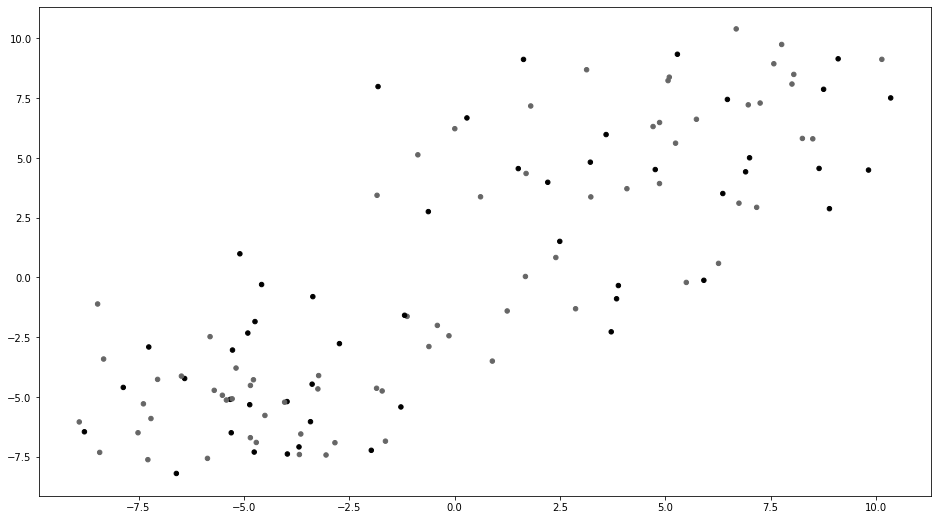

In [3]:
plt.figure(figsize=(16, 9))
data.graph_data(p1_x, p1_y, p1_y)

## Zadatak 2 - Višeslojna klasifikacija u Pythonu (20% bodova)

[<- Prethodni zadatak](#Zadatak-1---Generiranje-linearno-nerazdvojivih-podataka)  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Sljedeći zadatak ->](#Zadatak-3---Linearna-regresija-u-PyTorchu-(10%-bodova))

Oblikujte i izvedite modul `fcann2` za rad s probabilističkim klasifikacijskim modelom s jednim skrivenim slojem prema uputama iz odjeljka **0a**. Neka organizacija vašeg koda bude sukladna organizaciji modula `logreg` iz prethodne vježbe. Napišite metode `fcann2_train`, `fcann2_classify`. Isprobajte njihov rad na umjetnom skupu 2D podataka dvaju razreda dobivenih iz Gaussove mješavine od $6$ komponenata. 

#### Komentar

Arhitektura modula je izvedeno nešto drukčije od traženog, ali samo da bude preglednije. Bez obzira na to, sva tražena funkcionalnost je ostvarena.

In [4]:
p2_x, p2_y = data.sample_gmm_2d(6, 2, 30)

p2_y_ = data.convert_to_one_hot(p2_y, 2)

p2_box = np.min(p2_x, axis=0), np.max(p2_x, axis=0)

p2_architecture = [2, 128, 2]
p2_n_epochs = 10000
p2_learning_rate = 0.1
p2_weight_decay = 1e-4

In [5]:
p2_model = fcann2.ANN(*p2_architecture)
p2_model.train(p2_x, p2_y_, p2_n_epochs, p2_learning_rate, p2_weight_decay)

[Epoch 10000]	Loss: 0.6851: 100%|██████████| 10000/10000 [00:10<00:00, 960.18it/s]


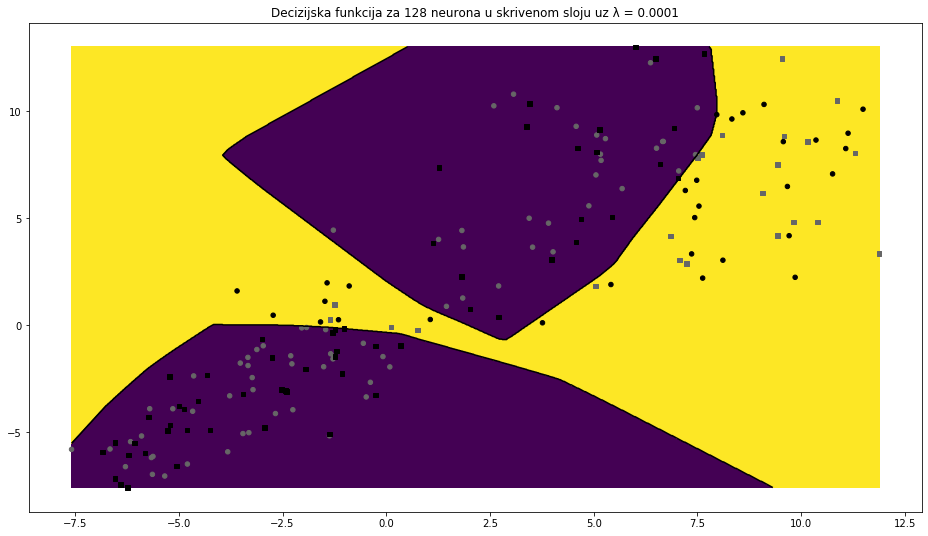

In [6]:
p2_fig = plt.figure(figsize=(16, 9))

data.graph_surface(p2_model.classify, p2_box, 0.5, 1024, 1024)
data.graph_data(p2_x, p2_y, p2_model.classify(p2_x))

p2_ax = p2_fig.axes[0]
p2_ax.set_title(f"Decizijska funkcija za {p2_architecture[1]} neurona u skrivenom sloju uz λ = {p2_weight_decay}");

## Zadatak 3 - Linearna regresija u PyTorchu (10% bodova)

[<- Prethodni zadatak](#Zadatak-2---Višeslojna-klasifikacija-u-Pythonu-(20%-bodova))  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Sljedeći zadatak ->](#Zadatak-4---Logistička-regresija-u-PyTorchu-(20%-bodova))

### Podzadatak 1

Ponovite osnove PyTorcha navedene u odjeljcima **0b** i **0c**. Analizirajte prikazani program te provjerite ispravnost izvođenja:

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim


# Definicija grafa, tj. parametara grafa.
#
#     Varijable su jednodimenzionalne nasumično odabrane
#     vrijednosti iz normalne razdiobe, dimenzija (1, ).
#
#     Argument requires_grad=True označava da se za ovu
#     varijablu računa gradijent, tj. da ga ona potrebuje.

a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Definicija skupa za učenje.
#
#     Ulazi su 1 i 2, te su njima pridruženi izlazi 3 i 5.
#     Izvršava se na čipu.

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# Definicija optimizacijskog postupka
#
#     Koristi se stohastički gradijentni spust.
#     Parametri koje optimiziramo su a i b.
#     Stopa učenja je 0.1.

optimizer = optim.SGD([a, b], lr=0.1)

# Petlja za učenje
#
#     Hardkodiranih 100 epoha.

iterator = tqdm(range(100), file=sys.stdout)

for i in iterator:
    # Definicija funkcije mreže - pravac s koeficijentima a i b
    Y_ = a * X + b

    # Međukorak - razlika prave vrijednosti i predikcije
    diff = Y - Y_

    # Definicija gubitka - kvadratni gubitak
    loss = torch.sum(diff ** 2)

    # Računanje propagacije unatrag preko gubitka
    loss.backward()

    # Ažuriranje vrijednosti korakom optimizatora
    optimizer.step()

    # Čišćenje trenutnog gradijenta, tj. postavljanje na 0
    optimizer.zero_grad()

    # Ispis trenutnog stanja mreže
    iterator.set_description(f"loss:{loss:.04f}, " +
                             f"Y_:{Y_.detach().numpy()},\t" +
                             f"a:{a.detach().numpy()[0]:.02f}, " +
                             f"b:{b.detach().numpy()[0]:.02f}")

loss:0.0003, Y_:[2.984336 5.009681],	a:2.02, b:0.96: 100%|██████████| 100/100 [00:00<00:00, 726.62it/s] 


#### Komentar

Lako je vidljivo da su parametri koje bi mreža trebala naučiti $[2, 1]$. S obzirom na to da mreža nakon $100$ epoha konvergira prema tim vrijednostima, vidimo da navedeni algoritam radi.

### Podzadatak 2

Modificirajte program na način da se pravac može provući kroz proizvoljan broj točaka. Pripazite da iznosi gradijenata budu neovisni o broju podataka.

#### Komentar

Ovo je postignutom implementacije `mean_square_loss` u `pt_linreg.py` koja uprosječuje gubitak za svaku točku i time pridonosi numeričkoj stabilnosti gubitka.

### Podzadatak 3 i 4

3. Ispišite vrijednosti gradijenata tijekom napredovanja postupka.
4. Odredite analitičke izraze za gradijente funkcije gubitka po parametrima `a` i `b`. Izračunajte eksplicitno te gradijente. Ispišite vrijednosti gradijenata i uvjerite se da odgovaraju onima koje automatski određuje PyTorch. 

S obzirom na to da su podzadatak **3** i **4** usko vezani jedan uz drugog, prvo ćemo riješiti dio **4. zadatka**, a potom oba riješiti jednom instancom ispisivanja.

#### Izvod gradijenata

Imamo sljedeće:

$$
\begin{equation}
\hat{y} \left( x \right) = a \cdot \vec{x} + b \\\\
\mathcal{L}(y, \hat{y}) = \frac{1}{n}\sum_{i = 0}^{n}{{\left( y_i - \hat{y}_i \right)}^2}
\end{equation}
$$

Želimo li minimizirati pogrešku preko $a$ i $b$, trebamo pronaći derivaciju gubitka po tim parametrima, tj. trebamo pronaći $\frac{\partial{\mathcal{L}}}{\partial{a}}$ i $\frac{\partial{\mathcal{L}}}{\partial{a}}$. Ako zamijenimo $\hat{y}$ u jednadžbi za $\mathcal{L}$ s izrazom iznad, dobivamo izraz

$$
\begin{equation}
\mathcal{L}(y, x, a, b) = \frac{1}{n}\sum_{i = 0}^{n}{{\left( y_i - a \cdot x_i - b \right)}^2}
\end{equation}
$$

koji je tada iznimno lagano derivirati:

$$
\begin{equation}
\begin{split}
& \frac{\partial{\mathcal{L}}}{\partial{a}} & = \frac{2}{n}\sum_{i = 0}^{n}{{\left( a \cdot x + b - y \right)} \cdot x} \\\\
& \frac{\partial{\mathcal{L}}}{\partial{b}} & = \frac{2}{n}\sum_{i = 0}^{n}{{\left( a \cdot x + b - y \right)}}
\end{split}
\end{equation}
$$

#### Zadatak

Ponašanje smo implementirali kroz metodu `do_linear_regression` u `pt_linreg.py`. U ispisu, s `∇` označavamo PyTorchev gradijent, dok s `∇*` označavamo naš izračunati gradijent.

In [8]:
pt_linreg.do_linear_regression(verbose=2)

Epoha 1:	gubitak = 4.819566, 1.60 * [1 2] + 0.94 = [1.4225203 2.3259227]
∇(a) = -6.926,  ∇(b) = -4.252
∇*(a) = -6.926,  ∇*(b) = -4.252

Epoha 2:	gubitak = 0.478760, 1.81 * [1 2] + 1.08 = [2.5402393 4.1362057]
∇(a) = -2.187,  ∇(b) = -1.324
∇*(a) = -2.187,  ∇*(b) = -1.324

Epoha 3:	gubitak = 0.049114, 1.88 * [1 2] + 1.12 = [2.8913298 4.706031 ]
∇(a) = -0.697,  ∇(b) = -0.403
∇*(a) = -0.697,  ∇*(b) = -0.403

Epoha 4:	gubitak = 0.006543, 1.91 * [1 2] + 1.13 = [3.0012546 4.8856163]
∇(a) = -0.228,  ∇(b) = -0.113
∇*(a) = -0.228,  ∇*(b) = -0.113

Epoha 5:	gubitak = 0.002281, 1.92 * [1 2] + 1.13 = [3.0353189 4.9424324]
∇(a) = -0.080,  ∇(b) = -0.022
∇*(a) = -0.080,  ∇*(b) = -0.022

Epoha 6:	gubitak = 0.001812, 1.92 * [1 2] + 1.13 = [3.0455256 4.9606204]
∇(a) = -0.033,  ∇(b) = 0.006
∇*(a) = -0.033,  ∇*(b) = 0.006

Epoha 7:	gubitak = 0.001719, 1.92 * [1 2] + 1.13 = [3.0482342 4.9666524]
∇(a) = -0.018,  ∇(b) = 0.015
∇*(a) = -0.018,  ∇*(b) = 0.015

Epoha 8:	gubitak = 0.001666, 1.92 * [1 2] + 1.13 = [

Epoha 72:	gubitak = 0.000254, 1.97 * [1 2] + 1.05 = [3.0191636 4.9881563]
∇(a) = -0.005,  ∇(b) = 0.007
∇*(a) = -0.005,  ∇*(b) = 0.007

Epoha 73:	gubitak = 0.000246, 1.97 * [1 2] + 1.05 = [3.0188842 4.988329 ]
∇(a) = -0.004,  ∇(b) = 0.007
∇*(a) = -0.004,  ∇*(b) = 0.007

Epoha 74:	gubitak = 0.000239, 1.97 * [1 2] + 1.05 = [3.0186086 4.9884996]
∇(a) = -0.004,  ∇(b) = 0.007
∇*(a) = -0.004,  ∇*(b) = 0.007

Epoha 75:	gubitak = 0.000232, 1.97 * [1 2] + 1.05 = [3.0183368 4.988667 ]
∇(a) = -0.004,  ∇(b) = 0.007
∇*(a) = -0.004,  ∇*(b) = 0.007

Epoha 76:	gubitak = 0.000226, 1.97 * [1 2] + 1.05 = [3.0180695 4.9888325]
∇(a) = -0.004,  ∇(b) = 0.007
∇*(a) = -0.004,  ∇*(b) = 0.007

Epoha 77:	gubitak = 0.000219, 1.97 * [1 2] + 1.05 = [3.0178058 4.9889956]
∇(a) = -0.004,  ∇(b) = 0.007
∇*(a) = -0.004,  ∇*(b) = 0.007

Epoha 78:	gubitak = 0.000213, 1.97 * [1 2] + 1.05 = [3.0175462 4.989156 ]
∇(a) = -0.004,  ∇(b) = 0.007
∇*(a) = -0.004,  ∇*(b) = 0.007

Epoha 79:	gubitak = 0.000207, 1.97 * [1 2] + 1.04 = [3.

## Zadatak 4 - Logistička regresija u PyTorchu (20% bodova)

[<- Prethodni zadatak](#Zadatak-3---Linearna-regresija-u-PyTorchu-(10%-bodova))  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Sljedeći zadatak ->](#Zadatak-5---Konfigurabilni-duboki-modeli-u-PyTorchu-(20%-bodova))

### Podzadatak 1

Dopunite izvedbu razreda`PTLogreg`. Provjerite postiže li vaš program iste rezultate kao i odgovarajući program iz nulte vježbe za slučajeve dva i tri razreda podataka. Pripazite na to da gubitak karakterizirate tako da ne ovisi o broju podataka za učenje (tako je lakše interpretirati iznos gubitka te validirati korak učenja). 

#### Komentar

Nisam riješio **0. laboratorijsku vježbu** (iako sam je pregledao i pomogao jednom mlađem kolegi riješiti) jer sam već upoznat s dubokim učenjem, NumPyjem i Matplotlibom. Međutim, gubitak sam okarakterizirao kao prosjek po `axis=0`, prema tome, on više ne ovisi o količini podataka.

### Podzadatak 2

Dodajte regularizaciju na način da gubitak formulirate kao zbroj unakrsne entropije i L2 norme vektorizirane matrice težina pomnožene hiperparametrom `param_lambda`. Ispitajte utjecaj regularizacije na oblik decizijske plohe.

#### Napomena

Kod mene se `param_lambda` zove `regularize` da ne moram uvoditi 2 metode za trening.

In [9]:
p4_2_n_classes = 3
p4_2_x, p4_2_y = data.sample_gmm_2d(4, p4_2_n_classes, 5)

p4_2_x = torch.tensor(p4_2_x, dtype=torch.float)
p4_2_y_ = torch.tensor(data.convert_to_one_hot(p4_2_y), dtype=torch.float)

p4_2_epochs = 1000
p4_2_learning_rate = 1e-3
p4_2_verbose = 0

p4_2_lambdas = [0., 1e-4, 1e-2, 1.]

p4_2_models = list()

In [10]:
for l in p4_2_lambdas:
    p4_2_models.append(pt_logreg.LogisticRegression(2, p4_2_n_classes))
    
    pt_logreg.train(p4_2_models[-1], p4_2_x, p4_2_y_, p4_2_epochs, p4_2_learning_rate, p4_2_verbose, l)

In [11]:
p4_2_box = np.min(p4_2_x.numpy(), axis=0), np.max(p4_2_x.numpy(), axis=0)
p4_2_preds = [pt_logreg.eval(model, p4_2_x) for model in p4_2_models]

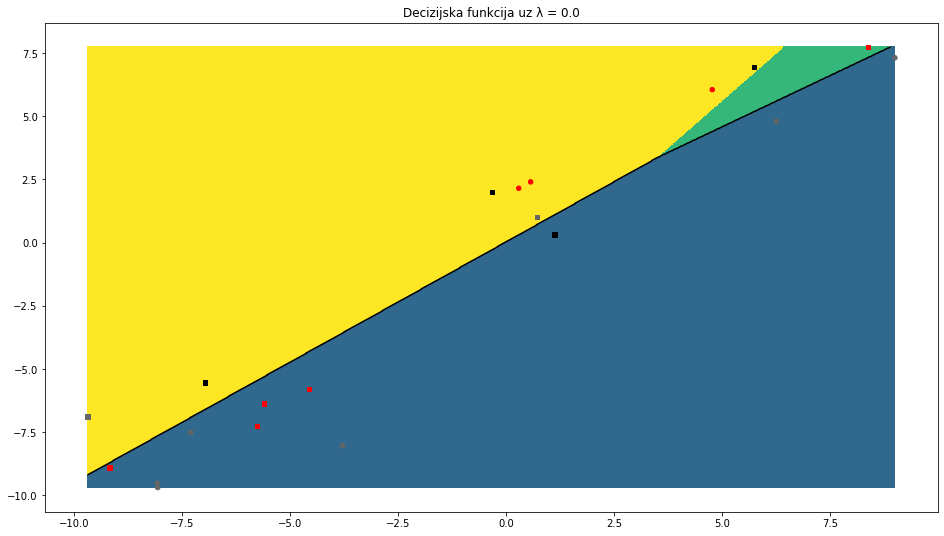

In [12]:
p4_2_fig_1 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: pt_logreg.eval(p4_2_models[0], x), p4_2_box, 0.5, 1024, 1024)
data.graph_data(p4_2_x, p4_2_y, p4_2_preds[0])

p4_2_fig_1_ax = p4_2_fig_1.axes[0]
p4_2_fig_1_ax.set_title(f"Decizijska funkcija uz λ = {p4_2_lambdas[0]}");

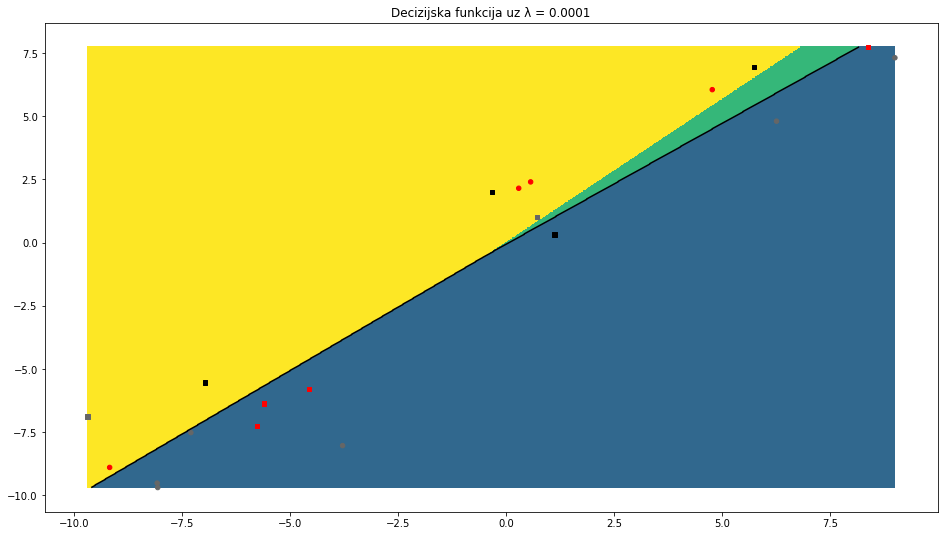

In [13]:
p4_2_fig_2 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: pt_logreg.eval(p4_2_models[1], x), p4_2_box, 0.5, 1024, 1024)
data.graph_data(p4_2_x, p4_2_y, p4_2_preds[1])

p4_2_fig_2_ax = p4_2_fig_2.axes[0]
p4_2_fig_2_ax.set_title(f"Decizijska funkcija uz λ = {p4_2_lambdas[1]}");

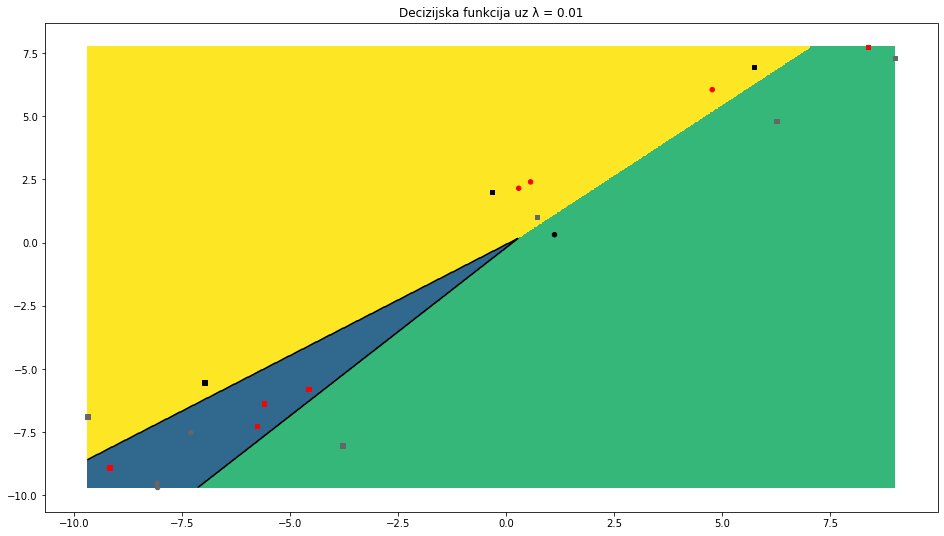

In [14]:
p4_2_fig_3 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: pt_logreg.eval(p4_2_models[2], x), p4_2_box, 0.5, 1024, 1024)
data.graph_data(p4_2_x, p4_2_y, p4_2_preds[2])

p4_2_fig_3_ax = p4_2_fig_3.axes[0]
p4_2_fig_3_ax.set_title(f"Decizijska funkcija uz λ = {p4_2_lambdas[2]}");

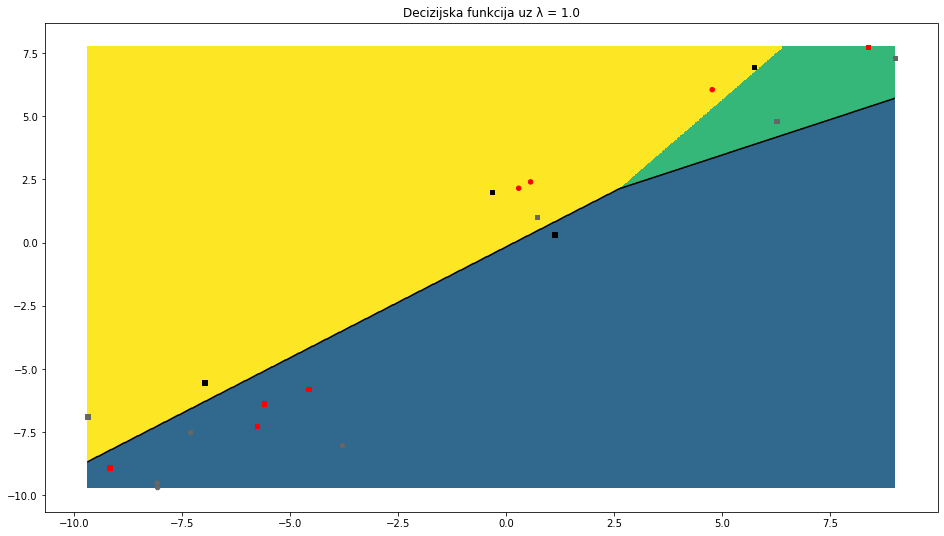

In [15]:
p4_2_fig_4 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: pt_logreg.eval(p4_2_models[3], x), p4_2_box, 0.5, 1024, 1024)
data.graph_data(p4_2_x, p4_2_y, p4_2_preds[3])

p4_2_fig_4_ax = p4_2_fig_4.axes[0]
p4_2_fig_4_ax.set_title(f"Decizijska funkcija uz λ = {p4_2_lambdas[3]}");

#### Komentar

Vidimo da je $\lambda = 1$ preveliki faktor regularicije: uz njega su svi primjeri označeni istom klasom, a čini se da prioritet ima ona klasa koja ima najveću frekvenciju uzoraka.

Međutim, vidimo da bez regularizacije nemamo optimalne rezultate, već ih ovisno o ulazu nalazimo za $\lambda = 0.01$ i $\lambda = 10^{-4}$.

### Podzadatak 3

 Eksperimentirajte s različitim vrijednostima hiperparametara. Pronađite kombinacije hiperparametara za koje vaš program ne uspijeva pronaći zadovoljavajuće rješenje i pokušajte objasniti što se događa. 

#### Komentar

Nije potrebno previše eksperimentirati jer smo to napravili u prethodnom podzadatku. Ponekad će izostanak regularizacije uzrokovati nemogućnost zadovoljavajućeg rješenja - primjerice ako je problem pretežak u smislu da imamo vrlo precizne ulaze i mrežu dovoljnog kapaciteta, težine nam mogu eksplodirati. Ovo u našem slučaju možemo postignuti uz ulaze koji se preklapaju u području koje oblikom odgovara nekoj decizijskoj funkciji.

S druge strane, vidimo da je $\lambda = 1$ preveliki faktor regularizacije za većinu slučajeva - u najgorem slučaju, mreža će nam za sve ulaze vraćati jednu klasu, uobičajeno je da je to najčešća klasa. S druge strane, on može uzrokovati da decizijska linija bude previše horizontalna, što isto ponekad možemo uočiti na grafovima iznad.

Sve u svemu, faktor regularizacije ovisi o arhitekturi mreže i o ulaznim podacima i to je jedan od hiperparametara za koji se trebamo potruditi naći optimalnu vrijednost pokušajima i neuspjesima.

## Zadatak 5 - Konfigurabilni duboki modeli u PyTorchu (20% bodova)

[<- Prethodni zadatak](#Zadatak-4---Logistička-regresija-u-PyTorchu-(20%-bodova))  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Sljedeći zadatak ->](#Zadatak-6---Usporedba-s-jezgrenim-SVM-om-(10%-bodova))

### Podzadatak 1

Izvedite razred `PTDeep` te isprobajte konfiguraciju $2 \times 3$ na istim podatcima kao i u prethodnom zadatku (ispitni program će vam biti vrlo sličan). Provjerite da su rezultati isti kao i ranije.

In [16]:
p5_1_n_classes = 3
p5_1_x, p5_1_y = data.sample_gmm_2d(4, p5_1_n_classes, 5)

p5_1_x = torch.tensor(p5_1_x, dtype=torch.float)
p5_1_y_ = torch.tensor(data.convert_to_one_hot(p5_1_y), dtype=torch.float)

p5_1_epochs = 3000
p5_1_learning_rate = 0.1
p5_1_verbose = 0

In [17]:
p5_1_logreg_model = pt_logreg.LogisticRegression(2, p5_1_n_classes)

pt_logreg.train(p5_1_logreg_model, p5_1_x, p5_1_y_, p5_1_epochs, p5_1_learning_rate, p5_1_verbose)

In [18]:
p5_1_model = pt_deep.Deep([2, p5_1_n_classes])
    
pt_deep.train(p5_1_model, p5_1_x, p5_1_y_, p5_1_epochs, p5_1_learning_rate, p5_1_verbose)

In [19]:
print(f"Prave oznake:\t{p5_1_y}\n")
print(f"LogReg oznake:\t{pt_logreg.eval(p5_1_logreg_model, p5_1_x)}")
print(f"Duboke oznake:\t{np.argmax(pt_deep.eval(p5_1_model, p5_1_x), axis=1)}")

Prave oznake:	[1 2 0 0 2 0 2 2 2 1 1 0 1 1 0 1 1 2 1 1]

LogReg oznake:	[1 0 1 1 1 2 1 2 2 2 1 0 0 1 0 1 1 0 1 1]
Duboke oznake:	[1 0 1 1 1 2 1 2 2 2 1 0 0 1 0 1 1 0 1 1]


Iz ovog je vidljivo da su perfomanse modela logističke regresije i dubokih modela gotovo identične.

### Podzadatak 2

Napišite metodu `count_params` koja će ispisati simboličko ime i dimenzije tenzora svih parametara. Dodatno, neka funkcija računa i ukupan broj parametara modela (npr. za konfiguraciju $2 \times 3$ rezultat bi trebao biti $9$). Za obilazak svih parametara modela sada elegantno možemo koristiti iterator [named_parameters](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.named_parameters). 

In [20]:
p5_2_model = pt_deep.Deep([2, 3])
_, p5_2_element_count = [v for _, v in p5_2_model.count_params().items()]

print(f"Broj parametara mreže 2 x 3 je {p5_2_element_count}.")

Broj parametara mreže 2 x 3 je 9.


### Podzadatak 3

Isprobajte vaš kod na podatcima dobivenim pozivima `data.sample_gmm_2d(4, 2, 40)` i `data.sample_gmm_2d(6, 2, 10)`, za konfiguracije $2 \times 2$, $2 \times 10 \times 2$ i $2 \times 10 \times 10 \times 2$. Ispišite točnost, odziv, preciznost i prosječnu preciznost te grafički prikažite rezultate klasifikacije i izgled decizijske plohe. Ako ne dođe do konvergencije, obratite pažnju na vrijednosti hiperparametara. 

In [21]:
p5_3_x, p5_3_y = data.sample_gmm_2d(4, 2, 40)
p5_3_x = torch.tensor(p5_3_x, dtype=torch.float)
p5_3_y_ = torch.tensor(data.convert_to_one_hot(p5_3_y), dtype=torch.float)

p5_3_xx, p5_3_yy = data.sample_gmm_2d(6, 2, 10)
p5_3_xx = torch.tensor(p5_3_xx, dtype=torch.float)
p5_3_yy_ = torch.tensor(data.convert_to_one_hot(p5_3_yy), dtype=torch.float)

p5_3_box = np.min(p5_3_x.numpy(), axis=0), np.max(p5_3_x.numpy(), axis=0)
p5_3_boxx = np.min(p5_3_xx.numpy(), axis=0), np.max(p5_3_xx.numpy(), axis=0)

p5_3_configurations =\
[
    [2, 2],
    [2, 10, 2],
    [2, 10, 10, 2]
]

p5_3_n_epochs = 3000
p5_3_learning_rate = 0.01
p5_3_verbose = 0

p5_3_models_1 = list()
p5_3_models_2 = list()
p5_3_metrics = list()

Prvo treniramo mrežu za prvu skup za učenje:

In [22]:
for configuration in p5_3_configurations:
    p5_3_models_1.append(pt_deep.Deep(configuration, activation=torch.relu))
    pt_deep.train(p5_3_models_1[-1], p5_3_x, p5_3_y_, p5_3_n_epochs, p5_3_learning_rate, p5_3_verbose)
    
    p5_3_metrics.append(pt_deep.eval_metrics(p5_3_models_1[-1], p5_3_x, np.argmax(p5_3_y_, axis=1)))

In [23]:
for configuration, metric in zip(p5_3_configurations, p5_3_metrics):
    accuracy = metric["acc"]
    precision = metric["pr"]
    recall = metric["re"]
    f1 = metric["f1"]
    
    print(f"Konfiguracija {configuration}:")
    print(f"\tTočnost:\t{accuracy * 100:.02f}%")
    print(f"\tPreciznost:\t{precision * 100:.02f}%")
    print(f"\tOdziv:  \t{recall * 100:.02f}%")
    print(f"\tF1-mjera:\t{f1 * 100:.02f}%")
    print()

Konfiguracija [2, 2]:
	Točnost:	52.50%
	Preciznost:	53.57%
	Odziv:  	53.26%
	F1-mjera:	53.41%

Konfiguracija [2, 10, 2]:
	Točnost:	47.50%
	Preciznost:	23.75%
	Odziv:  	50.00%
	F1-mjera:	32.20%

Konfiguracija [2, 10, 10, 2]:
	Točnost:	61.25%
	Preciznost:	73.77%
	Odziv:  	62.97%
	F1-mjera:	67.94%



In [24]:
p5_3_preds_1 = [np.argmax(pt_deep.eval(model, p5_3_x), axis=1) for model in p5_3_models_1]

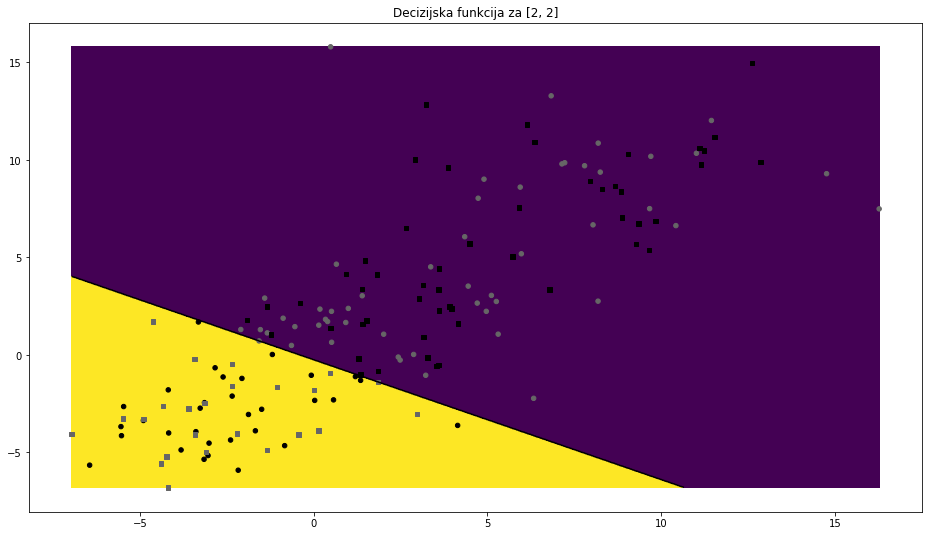

In [25]:
p5_3_fig_1 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_3_models_1[0], x), axis=1), p5_3_box, 0.5, 1024, 1024)
data.graph_data(p5_3_x, p5_3_y, p5_3_preds_1[0])

p5_3_fig_1_ax = p5_3_fig_1.axes[0]
p5_3_fig_1_ax.set_title(f"Decizijska funkcija za {p5_3_configurations[0]}");

/mnt/data/projekti/faks/DUBUCE/LAB1/data.py:57: UserWarning: No contour levels were found within the data range.
  plt.contour(xx0, xx1, values, colors="black", levels=[offset])


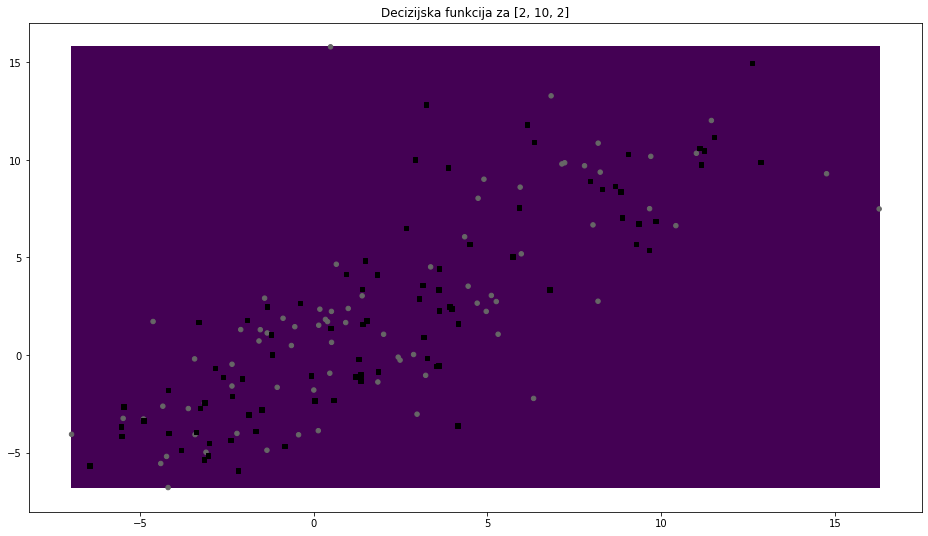

In [26]:
p5_3_fig_2 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_3_models_1[1], x), axis=1), p5_3_box, 0.5, 1024, 1024)
data.graph_data(p5_3_x, p5_3_y, p5_3_preds_1[1])

p5_3_fig_2_ax = p5_3_fig_2.axes[0]
p5_3_fig_2_ax.set_title(f"Decizijska funkcija za {p5_3_configurations[1]}");

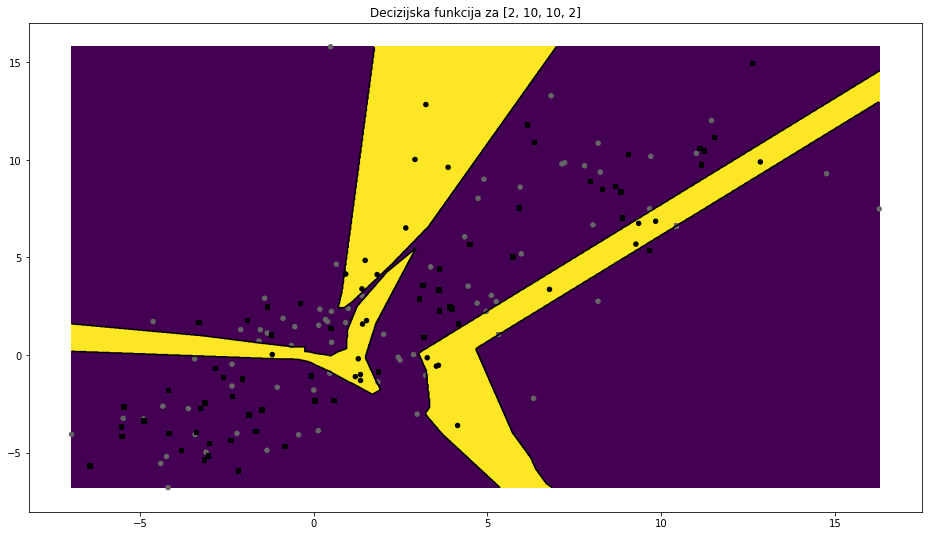

In [27]:
p5_3_fig_3 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_3_models_1[2], x), axis=1), p5_3_box, 0.5, 1024, 1024)
data.graph_data(p5_3_x, p5_3_y, p5_3_preds_1[2])

p5_3_fig_3_ax = p5_3_fig_3.axes[0]
p5_3_fig_3_ax.set_title(f"Decizijska funkcija za {p5_3_configurations[2]}");

Zatim treniramo na drugom skupu za učenje:

In [28]:
for configuration in p5_3_configurations:
    p5_3_models_2.append(pt_deep.Deep(configuration, activation=torch.relu))
    pt_deep.train(p5_3_models_2[-1], p5_3_xx, p5_3_yy_, p5_3_n_epochs, p5_3_learning_rate, p5_3_verbose)
    
    p5_3_metrics.append(pt_deep.eval_metrics(p5_3_models_2[-1], p5_3_xx, np.argmax(p5_3_yy_, axis=1)))

In [29]:
for configuration, metric in zip(p5_3_configurations, p5_3_metrics[len(p5_3_configurations):]):
    accuracy = metric["acc"]
    precision = metric["pr"]
    recall = metric["re"]
    f1 = metric["f1"]
    
    print(f"Konfiguracija {configuration}:")
    print(f"\tTočnost:\t{accuracy * 100:.02f}%")
    print(f"\tPreciznost:\t{precision * 100:.02f}%")
    print(f"\tOdziv:  \t{recall * 100:.02f}%")
    print(f"\tF1-mjera:\t{f1 * 100:.02f}%")
    print()

Konfiguracija [2, 2]:
	Točnost:	55.00%
	Preciznost:	60.71%
	Odziv:  	57.74%
	F1-mjera:	59.19%

Konfiguracija [2, 10, 2]:
	Točnost:	45.00%
	Preciznost:	22.50%
	Odziv:  	50.00%
	F1-mjera:	31.03%

Konfiguracija [2, 10, 10, 2]:
	Točnost:	78.33%
	Preciznost:	78.47%
	Odziv:  	77.61%
	F1-mjera:	78.04%



In [30]:
p5_3_preds_2 = [np.argmax(pt_deep.eval(model, p5_3_xx), axis=1) for model in p5_3_models_2]

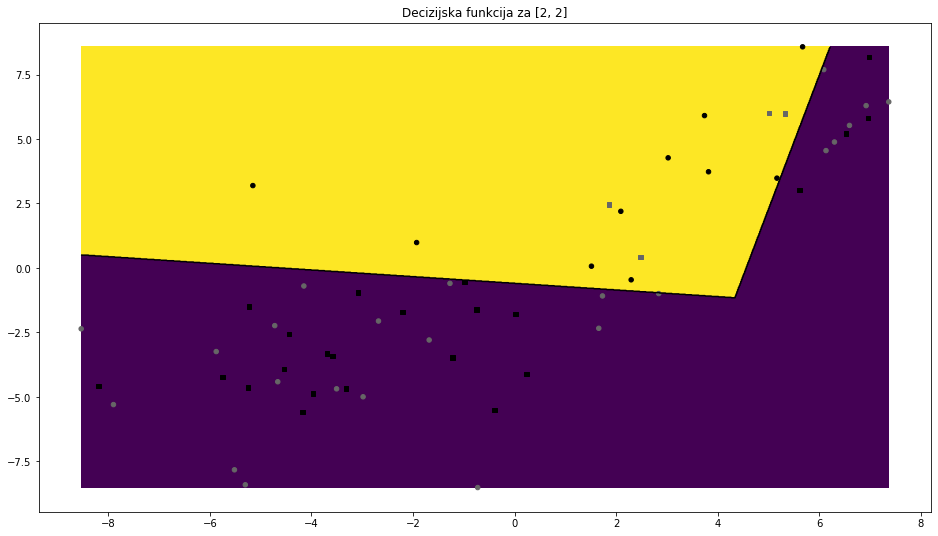

In [31]:
p5_3_fig_4 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_3_models_2[0], x), axis=1), p5_3_boxx, 0.5, 1024, 1024)
data.graph_data(p5_3_xx, p5_3_yy, p5_3_preds_2[0])

p5_3_fig_4_ax = p5_3_fig_4.axes[0]
p5_3_fig_4_ax.set_title(f"Decizijska funkcija za {p5_3_configurations[0]}");

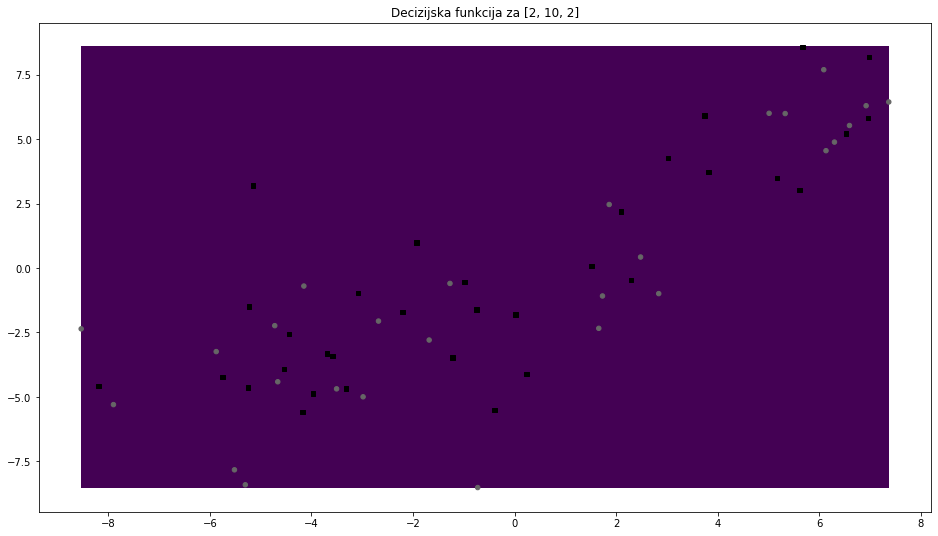

In [32]:
p5_3_fig_5 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_3_models_2[1], x), axis=1), p5_3_boxx, 0.5, 1024, 1024)
data.graph_data(p5_3_xx, p5_3_yy, p5_3_preds_2[1])

p5_3_fig_5_ax = p5_3_fig_5.axes[0]
p5_3_fig_5_ax.set_title(f"Decizijska funkcija za {p5_3_configurations[1]}");

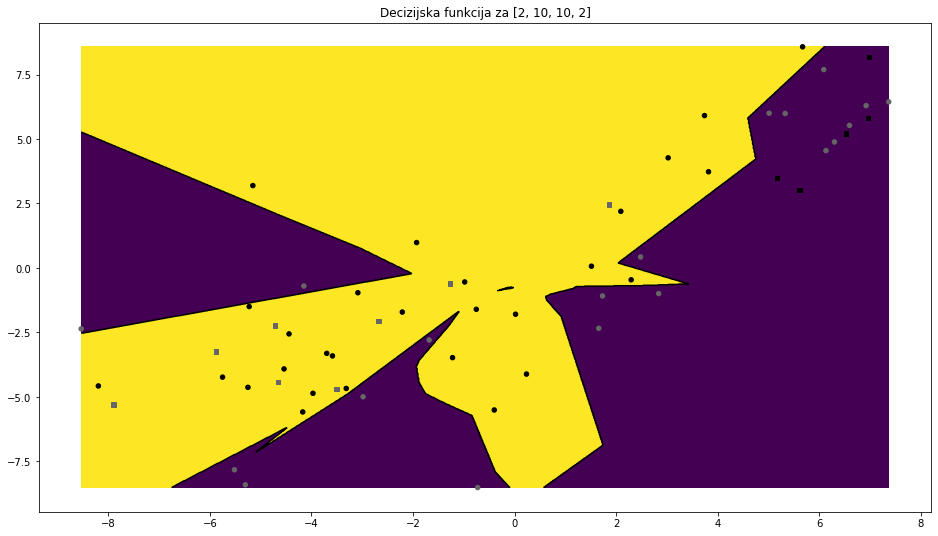

In [33]:
p5_3_fig_6 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_3_models_2[2], x), axis=1), p5_3_boxx, 0.5, 1024, 1024)
data.graph_data(p5_3_xx, p5_3_yy, p5_3_preds_2[2])

p5_3_fig_6_ax = p5_3_fig_6.axes[0]
p5_3_fig_6_ax.set_title(f"Decizijska funkcija za {p5_3_configurations[2]}");

#### Komentar

Vidimo da naš klasifikator ne radi baš najbolje. Ovo je, s jedne strane, zbog malih kapaciteta mreža a iznimno raštrkanih podataka. Da nam funkcija koja generira podatke ima manje raspršenje, vjerojatno mi imali bolje rezultate.

### Podzadatak 4

Usporedite rezultate s onim što se zbiva kad za prijenosnu funkciju postavite sigmoidu. Sigmoida bi za ovakve male probleme zbog neprekidnosti trebala postići bolje rezultate od zglobnice. Glavna prednost zglobnice je u tome što nema zasićenje pa kod dubljih modela gradijenti teže nestaju.

In [34]:
p5_4_x, p5_4_y = data.sample_gmm_2d(4, 2, 40)
p5_4_x = torch.tensor(p5_4_x, dtype=torch.float)
p5_4_y_ = torch.tensor(data.convert_to_one_hot(p5_4_y), dtype=torch.float)

p5_4_box = np.min(p5_4_x.numpy(), axis=0), np.max(p5_4_x.numpy(), axis=0)

p5_4_configurations =\
[
    [2, 2],
    [2, 10, 2],
    [2, 10, 10, 2]
]

p5_4_n_epochs = 3000
p5_4_learning_rate = 0.01
p5_4_verbose = 0

p5_4_models = list()
p5_4_metrics = list()

In [35]:
for configuration in p5_4_configurations:
    p5_4_models.append(pt_deep.Deep(configuration, activation=torch.sigmoid))
    pt_deep.train(p5_4_models[-1], p5_4_x, p5_4_y_, p5_4_n_epochs, p5_4_learning_rate, p5_4_verbose)
    
    p5_4_metrics.append(pt_deep.eval_metrics(p5_4_models[-1], p5_4_x, np.argmax(p5_4_y_, axis=1)))

In [36]:
for configuration, metric in zip(p5_4_configurations, p5_4_metrics):
    accuracy = metric["acc"]
    precision = metric["pr"]
    recall = metric["re"]
    f1 = metric["f1"]
    
    print(f"Konfiguracija {configuration}:")
    print(f"\tTočnost:\t{accuracy * 100:.02f}%")
    print(f"\tPreciznost:\t{precision * 100:.02f}%")
    print(f"\tOdziv:  \t{recall * 100:.02f}%")
    print(f"\tF1-mjera:\t{f1 * 100:.02f}%")
    print()

Konfiguracija [2, 2]:
	Točnost:	55.62%
	Preciznost:	55.56%
	Odziv:  	55.62%
	F1-mjera:	55.59%

Konfiguracija [2, 10, 2]:
	Točnost:	60.62%
	Preciznost:	63.03%
	Odziv:  	57.39%
	F1-mjera:	60.08%

Konfiguracija [2, 10, 10, 2]:
	Točnost:	59.38%
	Preciznost:	60.80%
	Odziv:  	56.12%
	F1-mjera:	58.37%



#### Komentar

Vidimo da su rezultati konzistentniji i ponešto bolji za male mreže.

In [37]:
p5_4_preds = [np.argmax(pt_deep.eval(model, p5_4_x), axis=1) for model in p5_4_models]

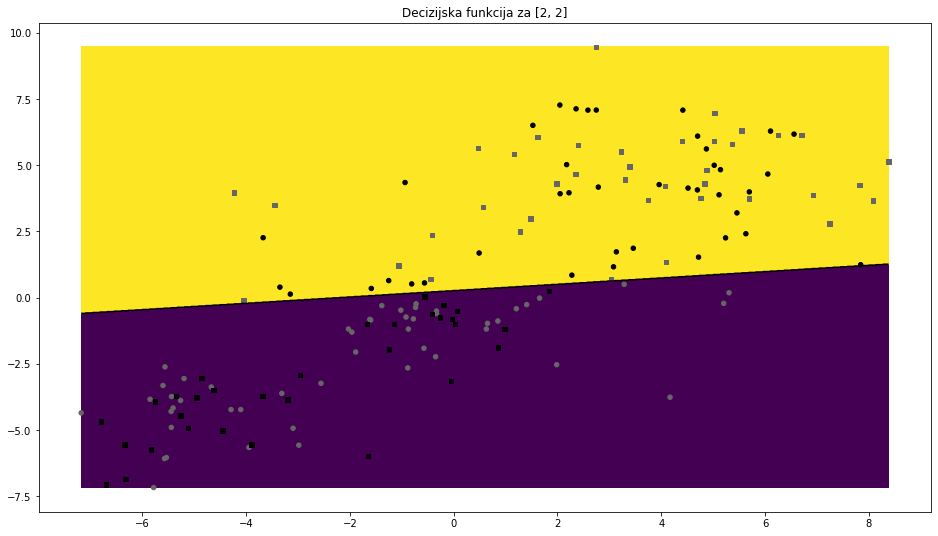

In [38]:
p5_4_fig_1 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_4_models[0], x), axis=1), p5_4_box, 0.5, 1024, 1024)
data.graph_data(p5_4_x, p5_4_y, p5_4_preds[0])

p5_4_fig_1_ax = p5_4_fig_1.axes[0]
p5_4_fig_1_ax.set_title(f"Decizijska funkcija za {p5_4_configurations[0]}");

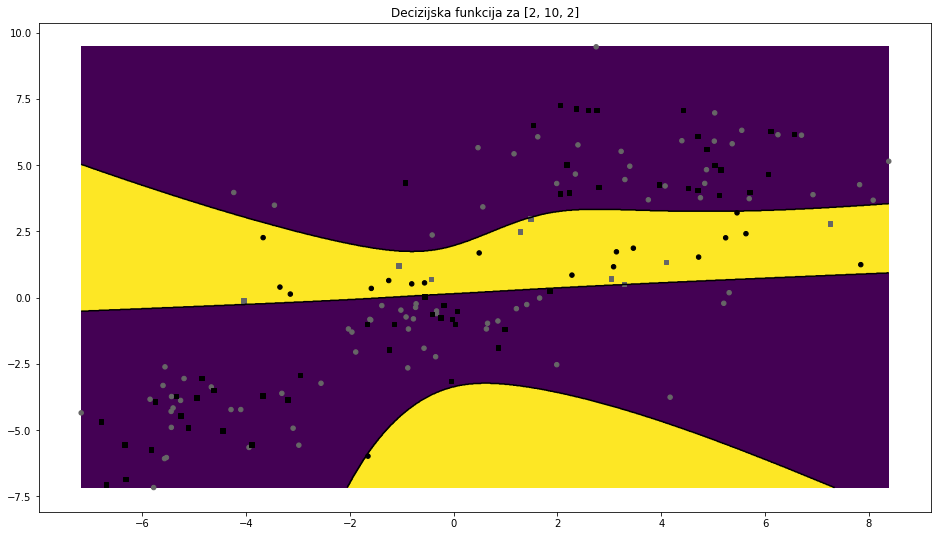

In [39]:
p5_4_fig_2 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_4_models[1], x), axis=1), p5_4_box, 0.5, 1024, 1024)
data.graph_data(p5_4_x, p5_4_y, p5_4_preds[1])

p5_4_fig_2_ax = p5_4_fig_2.axes[0]
p5_4_fig_2_ax.set_title(f"Decizijska funkcija za {p5_4_configurations[1]}");

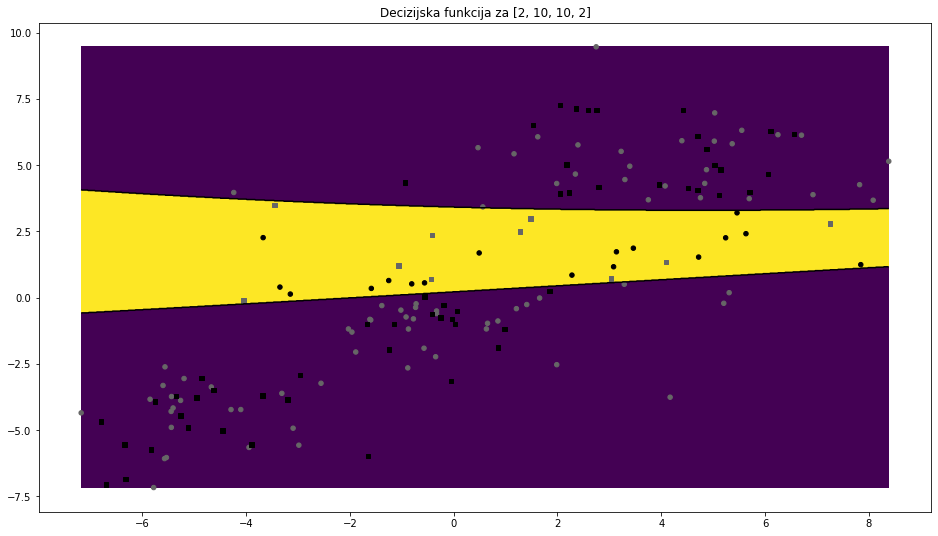

In [40]:
p5_4_fig_3 = plt.figure(figsize=(16, 9))

data.graph_surface(lambda x: np.argmax(pt_deep.eval(p5_4_models[2], x), axis=1), p5_4_box, 0.5, 1024, 1024)
data.graph_data(p5_4_x, p5_4_y, p5_4_preds[2])

p5_4_fig_3_ax = p5_4_fig_3.axes[0]
p5_4_fig_3_ax.set_title(f"Decizijska funkcija za {p5_4_configurations[2]}");

#### Komentar

Ujedno vidimo da su i decizijske krivulje nešto mirnije.

## Zadatak 6 - Usporedba s jezgrenim SVM-om (10% bodova)

[<- Prethodni zadatak](#Zadatak-5---Konfigurabilni-duboki-modeli-u-PyTorchu-(20%-bodova))  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Sljedeći zadatak ->](#Zadatak-7---Studija-slučaja:-MNIST-(20%-bodova))

### Podzadatak 1

Modificirajte funkciju `data.graph_data` na način da joj dodate argument `special`. Argument special zadaje listu indeksa podataka koje prilikom iscrtavanja treba posebno naglasiti udvostručavanjem veličine njihovih simbola. 

#### Komentar

Sada funkcija glasi:

```
def graph_data(x, y_true, y_pred, special=None):
    if special is None:
        special = []

    special = np.array(special)

    palette = ([0.4, 0.4, 0.4], [0., 0., 0.], [1., 0., 0.])
    colors = np.tile([0., 0., 0.], (y_true.shape[0], 1))

    for i in range(len(palette)):
        colors[y_true == i] = palette[i]

    sizes = np.repeat(20, len(y_true))

    if len(special) != 0:
        sizes[special] = 80

    good = (y_true == y_pred)
    plt.scatter(x[good, 0], x[good, 1], c=colors[good], s=sizes[good], marker='o')

    bad = (y_true != y_pred)
    plt.scatter(x[bad, 0], x[bad, 1], c=colors[bad], s=sizes[bad], marker='s')
```

Treba obratiti pozornost na `special` i `sizes`.

### Podzadatak 2

Isprobajte vaš razred na podacima dvaju razreda uzorkovanih iz mješavina Gaussovih distribucija. Kao i obično, ispišite pokazatelje performanse (točnost, odziv, preciznost, prosječnu preciznost).

In [41]:
p6_2_x, p6_2_y = data.sample_gmm_2d(5, 2, 100)

In [42]:
p6_2_model = ksvm_wrap.KSVMWrap(p6_2_x, p6_2_y)
p6_2_metrics = p6_2_model.eval_metrics(p6_2_x, p6_2_y)

In [43]:
for metric_name, metric_value in zip(["Točnost", "Preciznost", "Odziv", "F1-mjera"],
                                     p6_2_metrics.values()):
    print(f"{metric_name}:  \t{metric_value * 100:.02f}%")

Točnost:  	51.20%
Preciznost:  	51.37%
Odziv:  	51.32%
F1-mjera:  	51.34%


### Podzadatak 3

Usporedite performansu modela koje implementiraju razredi `PTDeep` i `KSVMWrap` na većem broju slučajnih skupova podataka.

In [44]:
p6_3_x, p6_3_y = data.sample_gmm_2d(100, 2, 100)

p6_3_n_epochs = 3000
p6_3_learning_rate = 0.1
p6_3_verbose = 0
p6_3_is_cuda = True

In [45]:
p6_3_x_ = torch.tensor(p6_3_x, dtype=torch.float)
p6_3_y_ = torch.tensor(data.convert_to_one_hot(p6_3_y, 2), dtype=torch.float)

if p6_3_is_cuda:
    p6_3_x_ = p6_3_x_.cuda()
    p6_3_y_ = p6_3_y_.cuda()

In [46]:
p6_3_deep_model = pt_deep.Deep([2, 256, 256, 2], activation=torch.relu, is_cuda=p6_3_is_cuda)
pt_deep.train(p6_3_deep_model, p6_3_x_, p6_3_y_, p6_3_n_epochs, p6_3_learning_rate, p6_3_verbose)

In [47]:
p6_3_svm_model = ksvm_wrap.KSVMWrap(p6_3_x, p6_3_y)

In [48]:
p6_3_deep_metrics = pt_deep.eval_metrics(p6_3_deep_model, p6_3_x_, torch.tensor(p6_3_y))
p6_3_svm_metrics = p6_3_svm_model.eval_metrics(p6_3_x, p6_3_y)

#### Metrike za duboku mrežu

In [49]:
for metric_name, metric_value in zip(["Točnost", "Preciznost", "Odziv", "F1-mjera"],
                                     p6_3_deep_metrics.values()):
    print(f"\t{metric_name}:  \t{metric_value * 100:.02f}%")

	Točnost:  	50.37%
	Preciznost:  	25.19%
	Odziv:  	50.00%
	F1-mjera:  	33.50%


#### Metrike za SVM

In [50]:
for metric_name, metric_value in zip(["Točnost", "Preciznost", "Odziv", "F1-mjera"],
                                     p6_3_svm_metrics.values()):
    print(f"\t{metric_name}:  \t{metric_value * 100:.02f}%")

	Točnost:  	50.37%
	Preciznost:  	25.19%
	Odziv:  	50.00%
	F1-mjera:  	33.50%


---

**Pitanje**: Koje su prednosti i nedostatci njihovih funkcija gubitka?

**Odgovor**: Kod dubokih mreža su funkcije gubitka obično lagano izračunljive. U ovom slučaju, primjerice, koristimo unakrsnu entropiju. Iako je SVM-ova funkcija gubitka, koja se svodi na zglobnicu još lakša za izračunati, proces učenja koji rezultira iz nje nije jednostavan.

Nedostatci su kod dubokih mreža obično to što nam funkcije gubitka moraju biti derivabilne (iako se ovo može izbjeći). Nedostatak funkcije gubitka SVM-a je što nije previše ekspresivna (ali to rješavamo jezgrama).

---

**Pitanje**: Koji od dvaju postupaka daje bolju garantiranu performansu?

**Odgovor**: To je zasigurno SVM - kod dubokih modela se gotovo uvijek kockamo.

---

**Pitanje**: Koji od postupaka može primiti veći broj parametara?

**Odgovor**: Ovo je interesantno pitanje. U našem slučaju, to je SVM, no to je zbog naše implementacije. SVM definira jednu porodicu algoritama koja je daleko manja od dubokih modela. Kod dubokih modela praktički nemamo ograničenja jer je definicija dubokih modela preopširna.

Stoga, u našem slučaju SVM ima više parametara, dok u generalnom slučaju duboki model mogu primiti veći broj parametara.

---

**Pitanje**: Koji bi od postupaka bio prikladniji za 2D podatke uzorkovane iz mješavine Gaussovi distribucija?

**Odgovor**: Ovo ovisi o podacima. U generalnom slučaju to će biti SVM, pogotovo za 2D podatke. Duboki modeli **mogu** imati bolje performanse za izrazito zamršene scene, no ukoliko se radi o Gaussovim distribucijama relativno pitomih devijacija, onda će SVM s RBF jezgrom u većini slučajeva bolje odraditi posao.

### Podzadatak 4

Iscrtajte decizijsku plohu i rezultate klasifikacije RBF SVM-a. Iskoristite argument `special` funkcije `data.graph_data` da u prikazu podataka posebno istaknete potporne vektore.

In [51]:
p6_4_x, p6_4_y = data.sample_gmm_2d(4, 2, 30)

p6_4_box = np.min(p6_4_x, axis=0), np.max(p6_4_x, axis=0)

In [52]:
p6_4_model = ksvm_wrap.KSVMWrap(p6_4_x, p6_4_y, kernel="rbf")

In [53]:
p6_4_metrics = p6_4_model.eval_metrics(p6_4_x, p6_4_y)

#### Metrike

In [54]:
for metric_name, metric_value in zip(["Točnost", "Preciznost", "Odziv", "F1-mjera"],
                                     p6_4_metrics.values()):
    print(f"\t{metric_name}:  \t{metric_value * 100:.02f}%")

	Točnost:  	75.00%
	Preciznost:  	75.02%
	Odziv:  	75.02%
	F1-mjera:  	75.02%


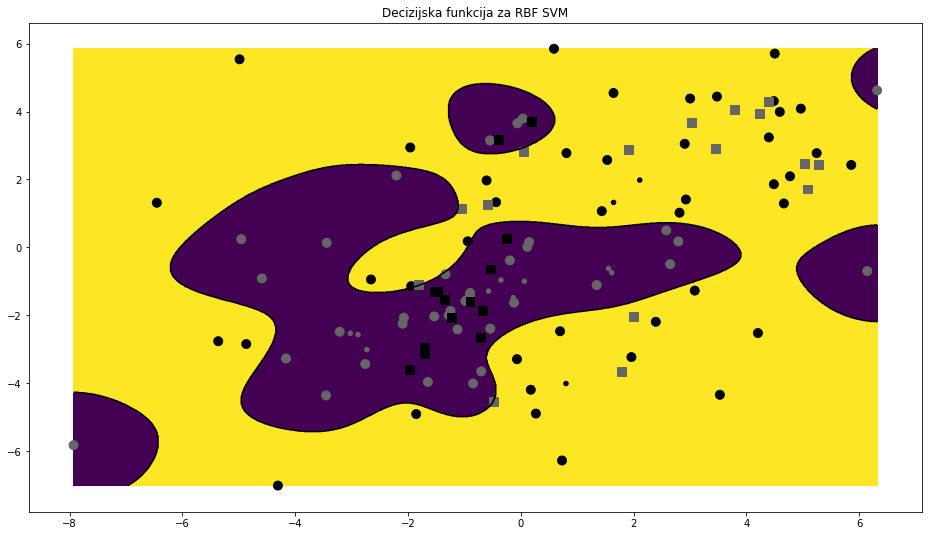

In [55]:
p6_4_fig = plt.figure(figsize=(16, 9))

data.graph_surface(p6_4_model.predict, p6_4_box, 0.5, 1024, 1024)
data.graph_data(p6_4_x, p6_4_y, p6_4_model.predict(p6_4_x), special=p6_4_model.support())

p6_4_ax = p6_4_fig.axes[0]
p6_4_ax.set_title(f"Decizijska funkcija za RBF SVM");

## Zadatak 7 - Studija slučaja: MNIST (20% bodova)

[<- Prethodni zadatak](#Zadatak-6---Usporedba-s-jezgrenim-SVM-om-(10%-bodova))  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

### Priprema varijabli

In [56]:
problem_7_cache_root = "data/problem_7"

task_1_folder_name = f"{problem_7_cache_root}/task_1"
task_2_name = "task_2.json"
task_3_name = "task_3.json"
task_4_name = "task_4.json"
task_5_name = "task_5.json"
task_6_name = "task_6.json"
task_7_name = "task_7.json"
task_8_name = "task_8.json"
task_9_name = "task_9.json"

### Podzadatak 1

Za model konfiguracije $\left[ 784, 10 \right]$ iscrtajte i komentirajte naučene matrice težina za svaku pojedinu znamenku. Ponovite za različite iznose regularizacije.

In [57]:
p7_1_weight_decays = [0., 1e-4, 1e-2, 1.]
p7_1_folder_names = [os.path.join(task_1_folder_name, f"l_{x}") for x in p7_1_weight_decays]

for folder_name in p7_1_folder_names:
    if not os.path.exists(folder_name):
        mnist_shootout.task_1_prep(*mnist_shootout.get_mnist(), p7_1_weight_decays)
        break

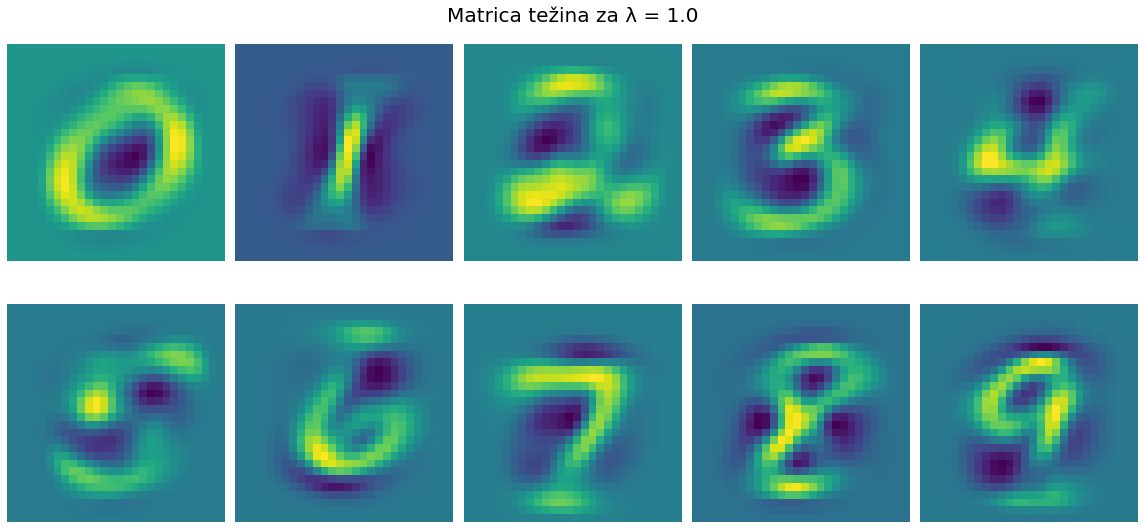

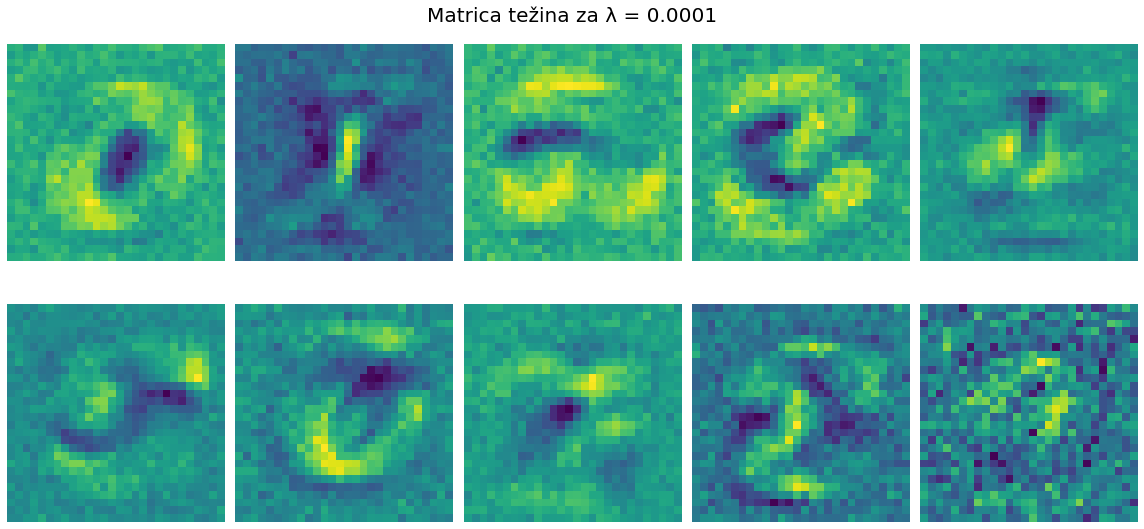

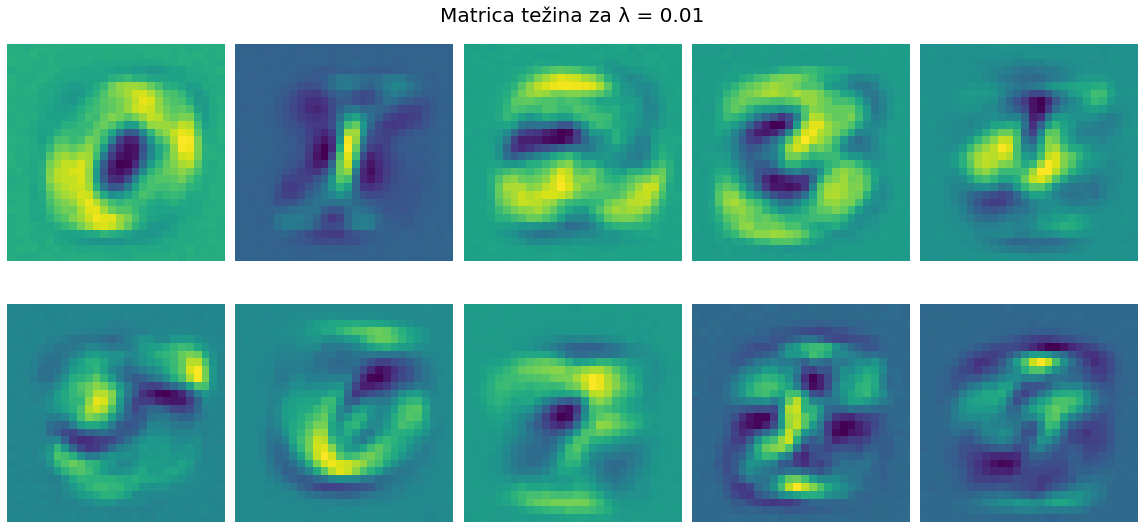

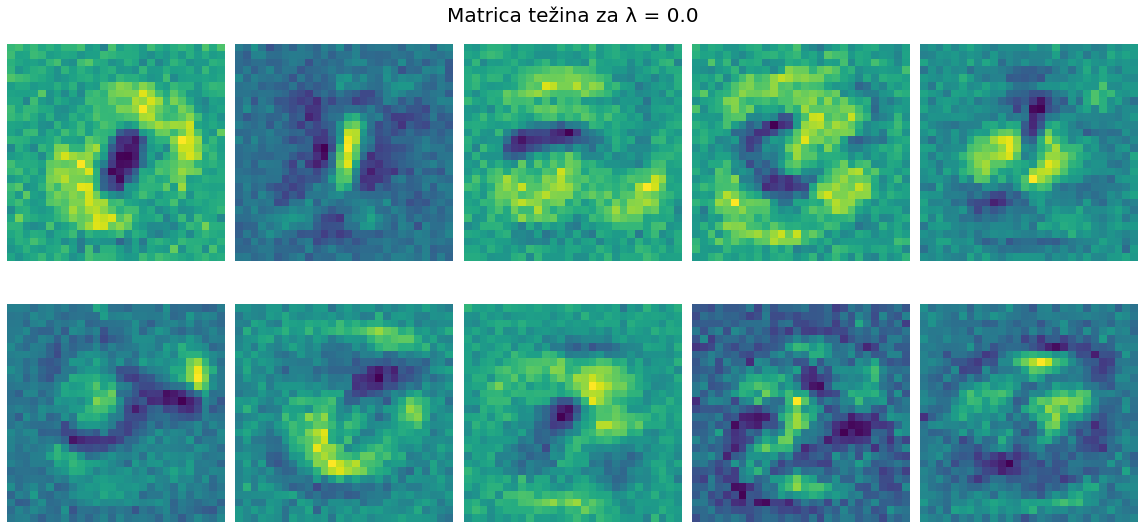

In [58]:
for folder_name in os.listdir(task_1_folder_name):
    figure_title = f"Matrica težina za λ = {folder_name[2:]}"
    
    current_fig, current_ax = plt.subplots(2, 5, figsize=(16, 8))
    current_fig.suptitle(figure_title, fontsize=20)
    
    for i in range(current_ax.size):
        a = i // 5
        b = i % 5
        
        current_ax[a, b].imshow(plt.imread(os.path.join(task_1_folder_name, folder_name, f"{i}.png")), label="i")
        current_ax[a, b].axis("off")
        
    current_fig.tight_layout();

### Podzadatak 2

Naučite duboke modele s konfiguracijama $\left[ 784, 10 \right]$, $\left[ 784, 100, 10 \right]$, $\left[ 784, 100, 100, 10 \right]$ i $\left[ 784, 100, 100, 100, 10 \right]$. Ako nemate funkcionalan GPU ne morate provoditi eksperimente s posljednje dvije konfiguracije. Nakon svake epohe učenja pohranite gubitak. Obratite pažnju na to da će dublji modeli bolje konvergirati s više iteracija s manjim korakom. Usporedite modele s obzirom na kretanje gubitka kroz epohe te pokazatelje performanse (točnost, preciznost, odziv) na skupovima za učenje i testiranje. Za najuspješniji model iscrtajte podatke koji najviše doprinose funkciji gubitka. 

In [59]:
p7_2_key_to_name =\
{
    "1": "784 x 10",
    "2": "784 x 100 x 10",
    "3": "784 x 100 x 100 x 10",
    "4": "784 x 100 x 100 x 100 x 10"
}

In [60]:
if task_2_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_2_prep(*mnist_shootout.get_mnist())

p7_2_result_dict = None

with open(f"{problem_7_cache_root}/{task_2_name}") as file:
    p7_2_result_dict = json.load(file)

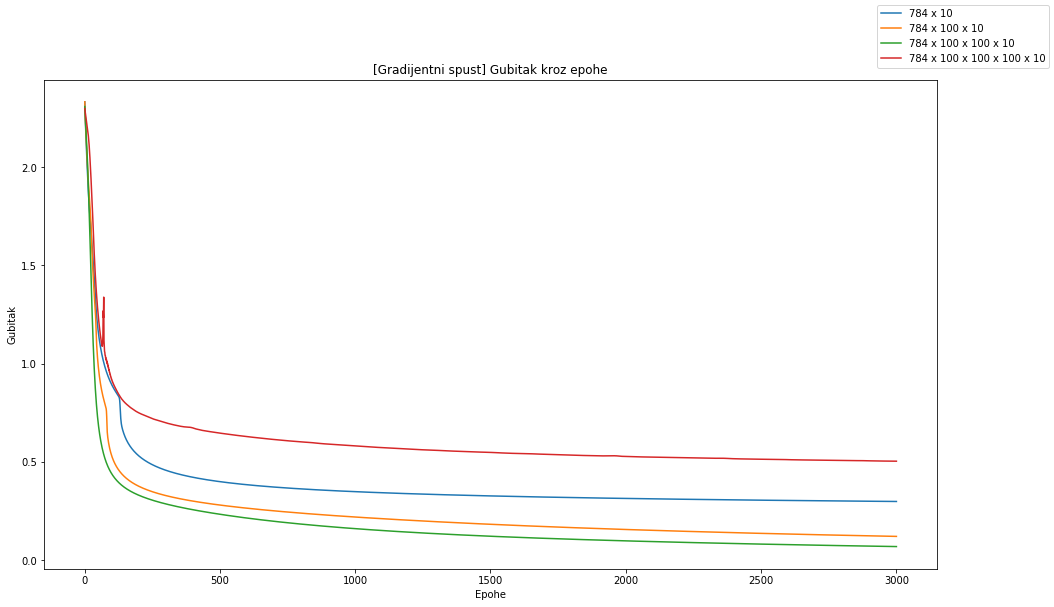

In [61]:
p7_2_fig, p7_2_ax = plt.subplots(figsize=(16, 9))

p7_2_ax.set_title("[Gradijentni spust] Gubitak kroz epohe")
p7_2_ax.set_xlabel("Epohe")
p7_2_ax.set_ylabel("Gubitak")

p7_2_table = [[], [], [], []]
p7_2_row_labels = ["Trening točnost", "Test točnost", "Trening F1-mjera", "Test F1-mjera"]
p7_2_col_labels = list()
    
for i, (key, values) in enumerate(sorted(p7_2_result_dict.items(), key=lambda x: x[0])):
    title = p7_2_key_to_name[key]
    losses = values["losses"]
    
    p7_2_col_labels.append(title)
    p7_2_table[0].append(f"{values['tr_acc'] * 100:.02f} %")
    p7_2_table[1].append(f"{values['te_acc'] * 100:.02f} %")
    p7_2_table[2].append(f"{values['tr_f1'] * 100:.02f} %")
    p7_2_table[3].append(f"{values['te_f1'] * 100:.02f} %")
    
    p7_2_ax.plot(range(1, len(losses) + 1), losses, label=title)
    
p7_2_fig.legend();

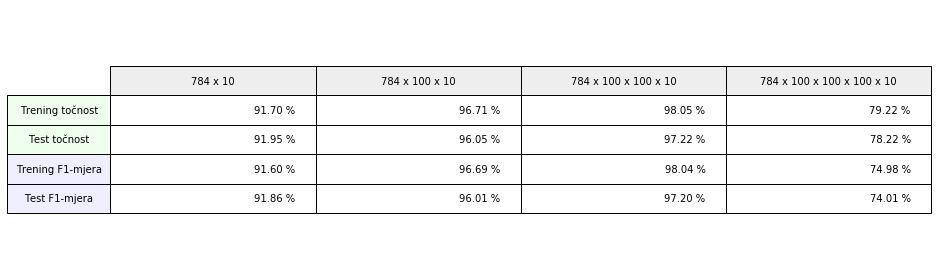

In [62]:
p7_2_fig_t, p7_2_ax_t = plt.subplots()

p7_2_ax_t.axis("tight")
p7_2_ax_t.axis("off")

p7_2_t = p7_2_ax_t.table(p7_2_table, rowLabels=p7_2_row_labels, colLabels=p7_2_col_labels,
                         rowColours=["#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         colColours=["#eeeeee" for _ in range(len(p7_2_col_labels))],
                         loc="center", rowLoc="center")

p7_2_t.scale(2, 2)
p7_2_fig_t.tight_layout()

#### Komentar

Ovaj test je pokrenut na način da se za svaku arhitekturu $3$ put pokrene treniranje. Težine su inicijalizirane **Xavier inicijalizacijom**, dok su pomaci postavljeni na $\vec{0}$. Za sve arhitekture korišteni su isti hiperparametri:

- broj epoha: $3000$
- stopa učenja: $0.1$

Vidimo da je najbolji rezultat postigla mreža arhitekture $784 \times 100 \times 100 \times 10$. Inače je u nekim drugim testiranjima bolje rezultate imala najveća mreža, no u prosječnom slučaju, zbog toga što imamo iste parametre, izgleda da je za ovakvu stopu učenja i broj epoha najbolja 3. arhitektura.

##### Napomena

U ovoj tablici nisu vidljivi preciznost i odziv, već je predstavljena F1-mjera. Inače su preciznost i odziv vrlo blizu jedan drugome, pa se oboje daju poistovjetiti s F1-mjerom. Ovime ćemo se voditi i u daljnjim mjerenjima.

### Podzadatak 3

Proučite utjecaj regularizacije na performansu dubokih modela na skupovima za učenje i testiranje. 

In [63]:
if task_3_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_3_prep(*mnist_shootout.get_mnist())

p7_3_result_dict = None

with open(f"{problem_7_cache_root}/{task_3_name}") as file:
    p7_3_result_dict = json.load(file)

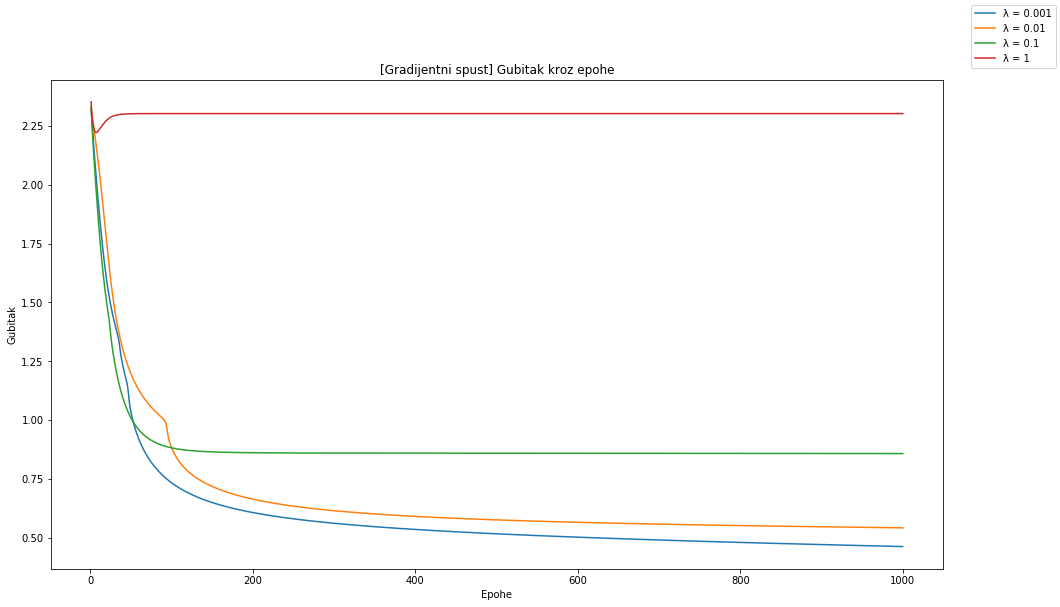

In [64]:
p7_3_fig, p7_3_ax = plt.subplots(figsize=(16, 9))

p7_3_ax.set_title("[Gradijentni spust] Gubitak kroz epohe")
p7_3_ax.set_xlabel("Epohe")
p7_3_ax.set_ylabel("Gubitak")

p7_3_table = [[], [], [], []]
p7_3_row_labels = ["Trening točnost", "Test točnost", "Trening F1-mjera", "Test F1-mjera"]
p7_3_col_labels = list()
    
for i, (key, values) in enumerate(p7_3_result_dict.items()):
    title = f"λ = {key}"
    losses = values["losses"]
    
    p7_3_col_labels.append(title)
    p7_3_table[0].append(f"{values['tr_acc'] * 100:.02f} %")
    p7_3_table[1].append(f"{values['te_acc'] * 100:.02f} %")
    p7_3_table[2].append(f"{values['tr_f1'] * 100:.02f} %")
    p7_3_table[3].append(f"{values['te_f1'] * 100:.02f} %")
    
    p7_3_ax.plot(range(1, len(losses) + 1), losses, label=title)
    
p7_3_fig.legend();

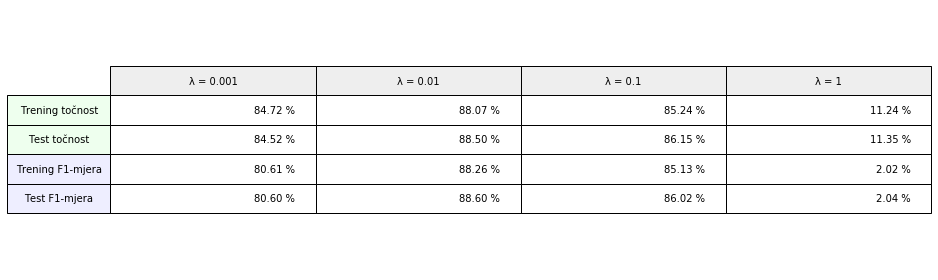

In [65]:
p7_3_fig_t, p7_3_ax_t = plt.subplots()

p7_3_ax_t.axis("tight")
p7_3_ax_t.axis("off")

p7_3_t = p7_3_ax_t.table(p7_3_table, rowLabels=p7_3_row_labels, colLabels=p7_3_col_labels,
                         rowColours=["#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         colColours=["#eeeeee" for _ in range(len(p7_3_col_labels))],
                         loc="center", rowLoc="center")

p7_3_t.scale(2, 2)
p7_3_fig_t.tight_layout()

#### Komentar

Ovo testiranje izvedeno je na mreži arhitekture $784 \times 100 \times 10$. Ovog puta, pokretali smo eksperiment samo jednom, ali su svi pokrenuti uz iste hiperparametre (osim različitih $λ$, tj. faktora regularizacije):

- broj epoha: $1000$
- stopa učenja: $0.1$

Vidimo da povećanjem faktora regularizacije mreža ima sve lošije performanse. Kroz testiranje, uočeno je da je za najmanji faktor obično najveća preciznost i F1-mjera, no u ovom slučaju, dogodilo se da je prvi eksperiment zapeo na nešto lošijem minimumu, dok je 2. eksperiment našao prilično dobar minimum. Nekome bi se možda moglo učiniti da je posljednji eksperiment zapeo u jako lošem lokalnom optimumu, no ponavljanjem testiranja utvrđeno je da je $λ = 1$ preveliki faktor regularizacije i da će konzistentno onemogućavati učenje.

### Podzadatak 4

Slučajno izdvojite $\frac{1}{5}$ podataka iz skupa za učenje u skup za validaciju. Tijekom treniranja evaluirajte validacijsku performansu nakon završetka petlje po grupama podataka te na kraju vratite model s najboljom validacijskom performansom (*engl. early stopping*). Procijenite postignuti utjecaj na konačnu vrijednost funkcije cilja i generalizacijsku performansu. 

In [66]:
if task_4_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_4_prep(*mnist_shootout.get_mnist())

p7_4_result_dict = None

with open(f"{problem_7_cache_root}/{task_4_name}") as file:
    p7_4_result_dict = json.load(file)

In [67]:
p7_4_table = [[f"{p7_4_result_dict['val_acc'] * 100:.02f} %"],
              [f"{p7_4_result_dict['te_acc'] * 100:.02f} %"],
              [f"{p7_4_result_dict['val_f1'] * 100:.02f} %"],
              [f"{p7_4_result_dict['te_f1'] * 100:.02f} %"]]
p7_4_row_labels = ["Validacijska točnost", "Test točnost", "Validacijska F1-mjera", "Test F1-mjera"]

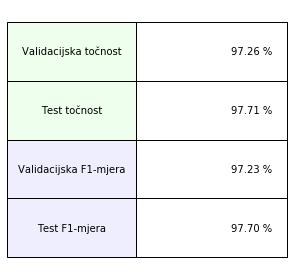

In [68]:
p7_4_fig_t, p7_4_ax_t = plt.subplots()

p7_4_ax_t.axis("tight")
p7_4_ax_t.axis("off")

p7_4_t = p7_4_ax_t.table(p7_4_table, rowLabels=p7_4_row_labels,
                         rowColours=["#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         loc="center", rowLoc="center")
p7_4_t.scale(2, 4)
p7_4_fig_t.tight_layout()

display(HTML(f"<br><br>Učenje je prekinuto u <b>{p7_4_result_dict['best_epoch']}</b>. epohi."))

#### Komentar

Ovo testiranje izvedeno je na arhitekturi $784 \times 100 \times 10$. Stopirali smo učenje kada se dogodilo da validacijski gubitak $5$ epoha za redom nije postigao nižu vrijednost od minimuma. Kad se to dogodilo, vratili smo parametre mreže za koje nam je validacijski gubitak bio optimalan. Korišteni su sljedeći hiperparametri:

- broj epoha: $100000$ (ali zaustavljeno prije toga)
- stopa učenja: $0.1$

Ako se vratimo na rezultate prethodna $2$ zadatka, uočit ćemo da imamo bolje rezultate. Ovo je najvjerojatnije radi toga što je mreža trenirala $5$ puta više nego prije. Međutim, treba primijetiti da iznosi točnosti i F1-mjera nisu lošiji upravo zato što smo zaustavili učenje nakon što nam se validacijska pogreška krenula povećavati. Time smo spriječili **prenaučenost**.

### Podzadatak 5

Implementirajte stohastički gradijentni spust odnosno postupak učenja po mini-grupama. Prije svake epohe izmiješajte podatke, zatim ih podijelite u $n$ grupa (*engl. mini-batch*) i onda provedite korak učenja za svaku grupu posebno. Pripazite na to da gubitak karakterizirate tako da ne ovisi o veličini grupe jer je tako lakše interpretirati iznos gubitka te validirati korak učenja. Vaš kod pohranite u metodi `train_mb`. Procijenite utjecaj na kvalitetu konvergencije i postignutu performansu za najuspješniju konfiguraciju iz prethodnog zadatka. Napomena: u svrhu razumijevanja postupka učenja po mini-grupama, u ovoj vježbi nije dozvoljeno korištenje razreda [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader). 

In [69]:
if task_5_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_5_prep(*mnist_shootout.get_mnist())

p7_5_result_dict = None

with open(f"{problem_7_cache_root}/{task_5_name}") as file:
    p7_5_result_dict = json.load(file)

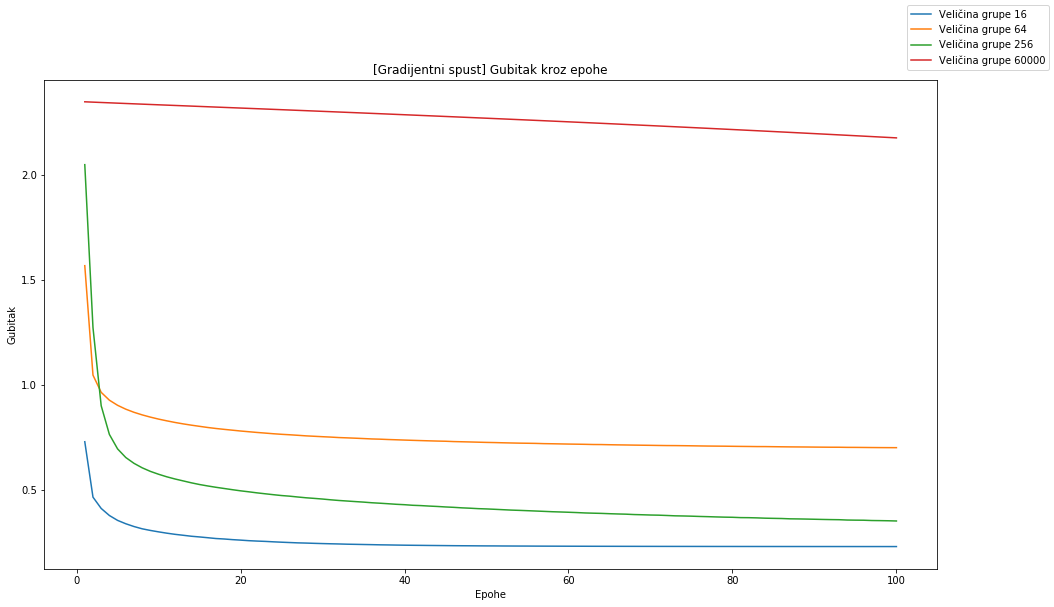

In [70]:
p7_5_fig, p7_5_ax = plt.subplots(figsize=(16, 9))

p7_5_ax.set_title("[Gradijentni spust] Gubitak kroz epohe")
p7_5_ax.set_xlabel("Epohe")
p7_5_ax.set_ylabel("Gubitak")

p7_5_table = [[], [], [], []]
p7_5_row_labels = ["Trening točnost", "Test točnost", "Trening F1-mjera", "Test F1-mjera"]
p7_5_col_labels = list()
    
for i, (key, values) in enumerate(p7_5_result_dict.items()):
    title = f"Veličina grupe {key}"
    losses = values["losses"]
    
    p7_5_col_labels.append(title)
    p7_5_table[0].append(f"{values['tr_acc'] * 100:.02f} %")
    p7_5_table[1].append(f"{values['te_acc'] * 100:.02f} %")
    p7_5_table[2].append(f"{values['tr_f1'] * 100:.02f} %")
    p7_5_table[3].append(f"{values['te_f1'] * 100:.02f} %")
    
    p7_5_ax.plot(range(1, len(losses) + 1), losses, label=title)
    
p7_5_fig.legend();

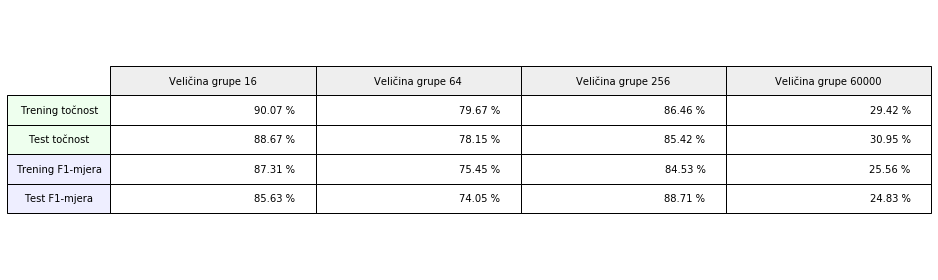

In [71]:
p7_5_fig_t, p7_5_ax_t = plt.subplots()

p7_5_ax_t.axis("tight")
p7_5_ax_t.axis("off")

p7_5_t = p7_5_ax_t.table(p7_5_table, rowLabels=p7_5_row_labels, colLabels=p7_5_col_labels,
                         rowColours=["#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         colColours=["#eeeeee" for _ in range(len(p7_5_col_labels))],
                         loc="center", rowLoc="center")

p7_5_t.scale(2, 2)
p7_5_fig_t.tight_layout()

#### Komentar

Ovo testiranje izvedeno je na arhitekturi $784 \times 100 \times 100 \times 10$. Korištene su veličine grupa $ \left\{ 16, 64, 256, 60000 \right\} $, te su svi eksperimenti imali iste hiperparametre:

- broj epoha: $100$
- stopa učenja: $0.1$

Razlog za ovakav mali broj epoha jest primarno dugo trajanje učenja za male veličine grupa. To je vidljivo i u rezultatima, tj. bilo bi da za veličinu grupe $256$ tijekom učenja nije pronađen optimalniji put nego kod ostalih eksperimenata. Da smo uzimali još manje veličine grupa, primjerice $1$, čime bi imali **stohastički gradijentni spust**, mogli bismo uočiti da je krivulja gubitka nestabilna: jedini razlog zašto to nismo učinili je zato što treba užasno dugo da se provede takvo učenja: samo učenje za veličinu grupe $16$ je trajalo oko $10$ minuta.

Zanimljivo je međutim, da iako za veličinu grupe $256$ imamo veću F1-mjeru, imamo manju točnost u odnosu na eksperiment s veličinom grupe $16$. Ovo je vjerojatno zato što je gubitak, koji je uspio biti manji za veličinu grupe $16$, direktno vezan uz točnost, međutim F1-mjera nije jednako naivna. Uvidom u mjere preciznosti i odziva zaključujem da je u oba slučaja prisutan disbalans preciznosti i odziva - za više informacija pregledati datoteku `data/problem_7/task_5.json`.

Također, uočavamo da je ovo premalen broj epoha za učenje s cijelim podatkovnim skupom, jer mreža za veličinu grupe $60000$ gotovo ništa nije uspjela naučiti.

### Podzadatak 6

Promijenite optimizator u [torch.optim.Adam](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam) s fiksnim korakom učenja $10^{-4}$. procijenite utjecaj te promjene na kvalitetu konvergencije i postignutu performansu.

In [72]:
if task_6_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_6_prep(*mnist_shootout.get_mnist())

p7_6_result_dict = None

with open(f"{problem_7_cache_root}/{task_6_name}") as file:
    p7_6_result_dict = json.load(file)

In [73]:
p7_6_table = [[f"{p7_6_result_dict['tr_acc'] * 100:.02f} %"],
              [f"{p7_6_result_dict['te_acc'] * 100:.02f} %"],
              [f"{p7_6_result_dict['tr_f1'] * 100:.02f} %"],
              [f"{p7_6_result_dict['te_f1'] * 100:.02f} %"]]
p7_6_row_labels = ["Trening točnost", "Test točnost", "Trening F1-mjera", "Test F1-mjera"]

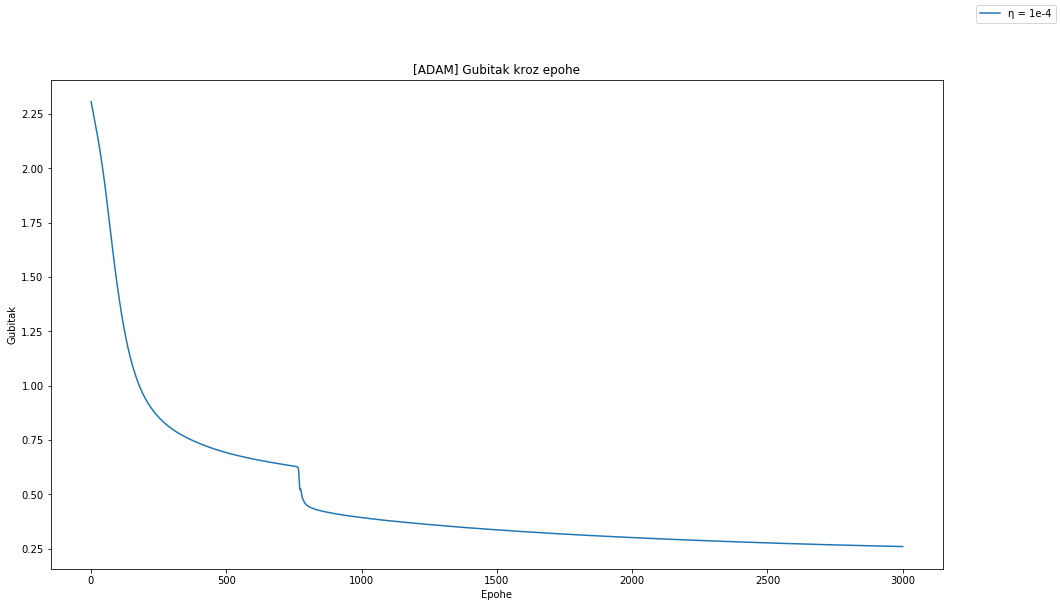

In [74]:
p7_6_fig, p7_6_ax = plt.subplots(figsize=(16, 9))

p7_6_ax.set_title("[ADAM] Gubitak kroz epohe")
p7_6_ax.set_xlabel("Epohe")
p7_6_ax.set_ylabel("Gubitak")

p7_6_losses = p7_6_result_dict["losses"]
  
p7_6_ax.plot(range(1, len(p7_6_losses) + 1), p7_6_losses, label=f"η = 1e-4")
p7_6_fig.legend();

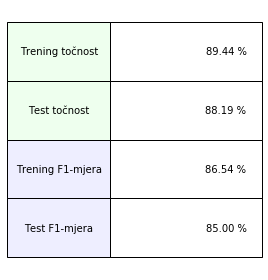

In [75]:
p7_6_fig_t, p7_6_ax_t = plt.subplots()

p7_6_ax_t.axis("tight")
p7_6_ax_t.axis("off")

p7_6_t = p7_6_ax_t.table(p7_6_table, rowLabels=p7_6_row_labels,
                         rowColours=["#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         loc="center", rowLoc="center")
p7_6_t.scale(2, 4)
p7_6_fig_t.tight_layout()

#### Komentar

Ovo testiranje izvedeno je na arhitekturi $784 \times 100 \times 100 \times 10$ uz hiperparametre:

- broj epoha: $3000$
- stopa učenja: $10^{-4}$

Zanimljivost u ovom slučaju jest ovaj oštri pad gubitka oko $750.$ epohe. Međutim, treba primijeniti da je osim tog pada uglavnom sporije konvergirao, te da su, u krajnjoj linije, performanse lošije nego kod [podzadatka 2](#Podzadatak-1-i-2). Ovo je najvjerojatnije radi $3$ reda veličine manje stope učenja.

### Podzadatak 7

 Isprobajte ADAM s varijabilnim korakom učenja. U izvedbi se pomognite funkcijom [torch.optim.lr_scheduler.ExponentialLR](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate), koju valja pozvati nakon svake epohe kao što je preporučeno u [dokumentaciji](https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.StepLR)). Neka početni korak učenja bude isti kao i ranije, a ostale parametre postavite na `gamma=1-1e-4`.

In [76]:
if task_7_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_7_prep(*mnist_shootout.get_mnist())

p7_7_result_dict = None

with open(f"{problem_7_cache_root}/{task_7_name}") as file:
    p7_7_result_dict = json.load(file)

In [77]:
p7_7_table = [[f"{p7_7_result_dict['tr_acc'] * 100:.02f} %"],
              [f"{p7_7_result_dict['te_acc'] * 100:.02f} %"],
              [f"{p7_7_result_dict['tr_f1'] * 100:.02f} %"],
              [f"{p7_7_result_dict['te_f1'] * 100:.02f} %"]]
p7_7_row_labels = ["Trening točnost", "Test točnost", "Trening F1-mjera", "Test F1-mjera"]

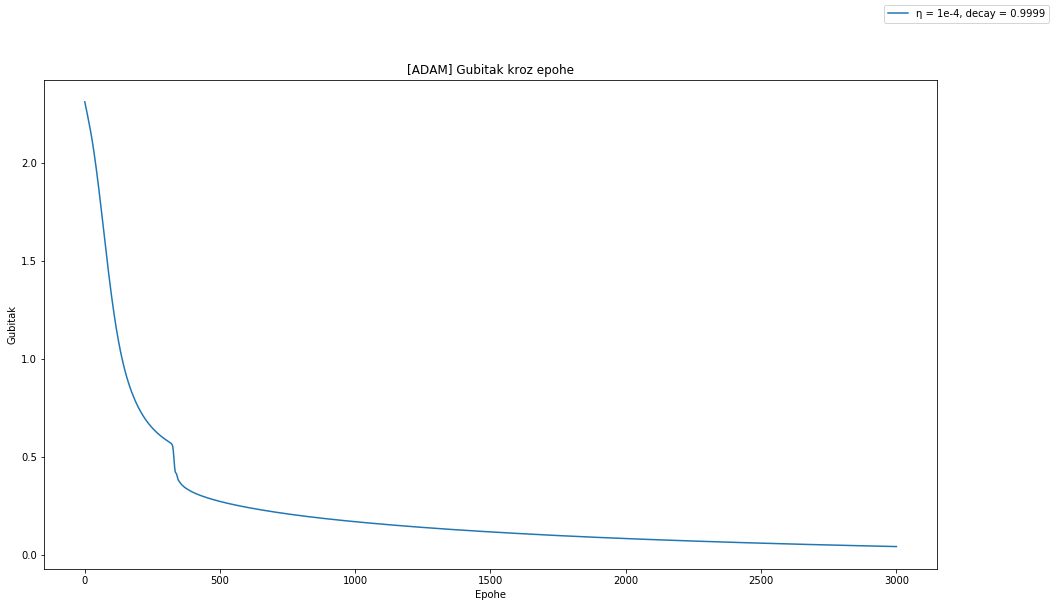

In [78]:
p7_7_fig, p7_7_ax = plt.subplots(figsize=(16, 9))

p7_7_ax.set_title("[ADAM] Gubitak kroz epohe")
p7_7_ax.set_xlabel("Epohe")
p7_7_ax.set_ylabel("Gubitak")

p7_7_losses = p7_7_result_dict["losses"]
  
p7_7_ax.plot(range(1, len(p7_7_losses) + 1), p7_7_losses, label=f"η = 1e-4, decay = 0.9999")
p7_7_fig.legend();

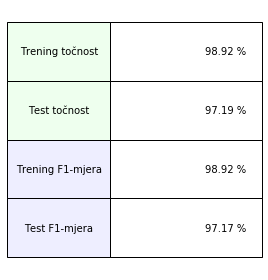

In [79]:
p7_7_fig_t, p7_7_ax_t = plt.subplots()

p7_7_ax_t.axis("tight")
p7_7_ax_t.axis("off")

p7_7_t = p7_7_ax_t.table(p7_7_table, rowLabels=p7_7_row_labels,
                         rowColours=["#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         loc="center", rowLoc="center")
p7_7_t.scale(2, 4)
p7_7_fig_t.tight_layout()

#### Komentar

Ovo testiranje izvedeno je na arhitekturi $784 \times 100 \times 100 \times 10$ uz hiperparametre:

- broj epoha: $3000$
- stopa učenja: $10^{-4}$
- koeficijent raspada stope učenja: $0.9999$


Opet, kao i u [podzadatku 6](#Podzadatak-6) imamo oštri pad na početku treniranja, no sad se on događa puno ranije, a imamo i bolju konvergenciju. To dokazuju i točnost i F1-mjera koje su sada drastično veće, na nivou najboljeg modela iz [podzadatka 2](#Podzadatak-1-i-2). Međutim, primjećujemo da se zbog veće točnosti i F1-mjere na skupu za učenje cijal mreža vjerojatno **prenaučila**.

### Podzadatak 8

Izračunajte i interpretirajte gubitak slučajno incijaliziranog modela (dakle, modela koji nije vidio podatke za učenje).

In [80]:
if task_8_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_8_prep(*mnist_shootout.get_mnist())

p7_8_result_dict = None

with open(f"{problem_7_cache_root}/{task_8_name}") as file:
    p7_8_result_dict = json.load(file)

In [81]:
p7_8_table = [[f"{p7_8_result_dict['tr_loss']:.04f}"],
              [f"{p7_8_result_dict['te_loss']:.04f}"],
              [f"{p7_8_result_dict['tr_acc'] * 100:.02f} %"],
              [f"{p7_8_result_dict['te_acc'] * 100:.02f} %"],
              [f"{p7_8_result_dict['tr_f1'] * 100:.02f} %"],
              [f"{p7_8_result_dict['te_f1'] * 100:.02f} %"]]
p7_8_row_labels = ["Trening gubitak",
                   "Test gubitak",
                   "Trening točnost",
                   "Test točnost",
                   "Trening F1-mjera",
                   "Test F1-mjera"]

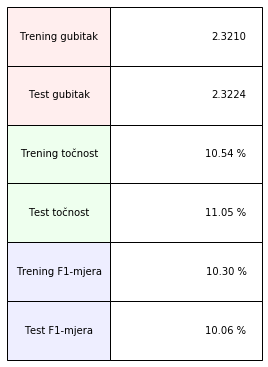

In [82]:
p7_8_fig_t, p7_8_ax_t = plt.subplots()

p7_8_ax_t.axis("tight")
p7_8_ax_t.axis("off")

p7_8_t = p7_8_ax_t.table(p7_8_table, rowLabels=p7_8_row_labels,
                         rowColours=["#ffeeee", "#ffeeee", "#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         loc="center", rowLoc="center")
p7_8_t.scale(2, 4)
p7_8_fig_t.tight_layout()

#### Komentar

Ovo testiranje je izvedeno na arhitekturi $784 \times 100 \times 100 \times 10$. Vidimo da su točnosti i F1-mjere iznimno male, te da je gubitak najveći viđeni do sad.

### Podzadatak 9

Naučite linearni i jezgreni SVM uz pomoć modula `sklearn.svm`. Koristite podrazumijevano **one vs one** proširenje SVM-a za klasificiranje podataka u više razreda. Pri eksperimentiranju budite strpljivi jer bi učenje i evaluacija mogli trajati više od pola sata. Usporedite dobivenu performansu s performansom dubokih modela. 

In [83]:
if task_9_name not in os.listdir(problem_7_cache_root):
    mnist_shootout.task_9_prep(*mnist_shootout.get_mnist())

p7_9_result_dict = None

with open(f"{problem_7_cache_root}/{task_9_name}") as file:
    p7_9_result_dict = json.load(file)

In [84]:
p7_9_table = [[f"{p7_9_result_dict['lsvm_acc'] * 100:.02f} %"],
              [f"{p7_9_result_dict['ksvm_acc'] * 100:.02f} %"],
              [f"{p7_9_result_dict['lsvm_f1'] * 100:.02f} %"],
              [f"{p7_9_result_dict['ksvm_f1'] * 100:.02f} %"]]
p7_9_row_labels = ["Točnost linearnog SVM-a",
                   "Točnost jezgrenog SVM-a",
                   "F1-mjera linearnog SVM-a",
                   "F1-mjera jezgrenog SVM-a"]

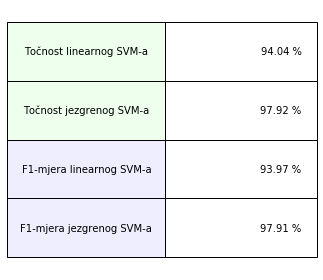

In [85]:
p7_9_fig_t, p7_9_ax_t = plt.subplots()

p7_9_ax_t.axis("tight")
p7_9_ax_t.axis("off")

p7_9_t = p7_9_ax_t.table(p7_9_table, rowLabels=p7_9_row_labels,
                         rowColours=["#eeffee", "#eeffee", "#eeeeff", "#eeeeff"],
                         loc="center", rowLoc="center")
p7_9_t.scale(2, 4)
p7_9_fig_t.tight_layout()

#### Komentar

Kao jezgru jezgrenog SVM-a koristili smo podrazumijevani argument `"rbf"`, tj. radijalnu baznu funkciju. Pretpostavljamo da su bolje performanse jezgrenog SVM-a rezultat veće ekspresivnosti, ali i time što je očito rbf primjerenija decizijska funkcija od linearne za ovakav tip podataka.

Međutim, valja primijetiti da smo puno dulje trenirali jezgreni SVM nego ijedan od naših dubokih modela, a opet nismo postigli znatno veće performanse od našeg najboljeg modela: arhitekture $784 \times 100 \times 10$ uz **early stopping**.